# exploratory data analytics
- import necessary libraries
- import the data and create the dataframe(loading thedataset)
- data understanding (checking the null values, duplicates, data type, renaming columns)
- data reduction (remove unnecessary columns (columns not needed for data analytics) from the dataset)
- feature engineering (creating new columns from existing ones,manipulating existing coulumns etc)
- data handling/data cleaning (cleaning row level data)
- EDA
- Univariate analysis
- bivariate analysis
- multivariate analysis 

In [232]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [233]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [234]:
##check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [235]:
#check null
df.isnull().sum()/len(df)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [236]:
# check duplicates
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

*data reduction*

In [237]:
df.drop(columns = ["S.No.", "New_Price"], inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [238]:
df.dropna(subset=["Mileage", "Engine", "Power", "Seats", "Price"], inplace = True)

In [239]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [241]:
df.reset_index(drop=True,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [242]:
#create a brand column from existing name column
df["Brand"] = df.Name.str.split().str.get(0)

In [243]:
#create a engine and power column by removing units
df["Engine"] = df.Engine.str.split().str.get(0)
df["Power"] = df.Power.str.split().str.get(0)

In [244]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,17.74,Audi


In [245]:
#convert engine and power column to numerical columns

df["Engine"] = pd.to_numeric(df["Engine"], errors="coerce")
df["Power"] = pd.to_numeric(df["Power"], errors="coerce")

In [246]:
mileage = "26.6 km/kg"
print("km/kg" in mileage)
value = mileage.replace("km/kg", "")
print(type(value))
float(value)

True
<class 'str'>


26.6

In [247]:
def kmkg_to_kmpl(mileage):
    if "km/kg" in mileage:
        value = float(mileage.replace(" km/kg", ""))
        return value*0.75
    elif "kmpl" in mileage:
        value = float(mileage.replace( "kmpl", ""))
        return value
    else:
        return np.nan

In [248]:
df["Mileage"] = df["Mileage"].apply(lambda x: kmkg_to_kmpl(str(x)))
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.95,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi


In [249]:
#convert seats column to categorical one
df["Seats"] = df["Seats"].astype("int")
df["Seats"] = df["Seats"].astype("str")

In [250]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti


In [251]:
from datetime import date

In [252]:
df["Car Age"] = date.today().year - df["Year"]

In [253]:
df.drop(columns = ["Name", "Year"], inplace = True)

In [254]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Car Age
0,Mumbai,72000,CNG,Manual,First,19.95,998,58.16,5,1.75,Maruti,15
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,10
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,14
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,13
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Delhi,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,Maruti,11
5971,Jaipur,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,Hyundai,10
5972,Jaipur,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,Mahindra,13
5973,Kolkata,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,Maruti,12


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Kilometers_Driven  5975 non-null   int64  
 2   Fuel_Type          5975 non-null   object 
 3   Transmission       5975 non-null   object 
 4   Owner_Type         5975 non-null   object 
 5   Mileage            5975 non-null   float64
 6   Engine             5975 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5975 non-null   object 
 9   Price              5975 non-null   float64
 10  Brand              5975 non-null   object 
 11  Car Age            5975 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 560.3+ KB


In [256]:
# DATA WRANGLING

In [257]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [258]:
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner_Type"].unique())
print(df["Seats"].unique())
print(df["Brand"].unique())

['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['5' '7' '8' '4' '6' '2' '10' '9' '0']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [259]:
import warnings

warnings.simplefilter(action="ignore", category="FutureWarnings")

In [260]:
df["Brand"].replace({"Land":"Land Rover","Mini":"Mini Cooper","ISUZU":"Isuzu"},inplace=True)

TypeError: issubclass() arg 2 must be a class, a tuple of classes, or a union

In [261]:
print(df["Brand"].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [262]:
df = df[df["Seats"] != "0"]

In [263]:
print(df["Seats"].unique())

['5' '7' '8' '4' '6' '2' '10' '9']


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5974 non-null   object 
 1   Kilometers_Driven  5974 non-null   int64  
 2   Fuel_Type          5974 non-null   object 
 3   Transmission       5974 non-null   object 
 4   Owner_Type         5974 non-null   object 
 5   Mileage            5974 non-null   float64
 6   Engine             5974 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5974 non-null   object 
 9   Price              5974 non-null   float64
 10  Brand              5974 non-null   object 
 11  Car Age            5974 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 606.7+ KB


In [265]:
df.dropna(subset=["Power","Mileage","Engine"], inplace = True)

TypeError: issubclass() arg 2 must be a class, a tuple of classes, or a union

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Mileage            5872 non-null   float64
 6   Engine             5872 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5872 non-null   object 
 9   Price              5872 non-null   float64
 10  Brand              5872 non-null   object 
 11  Car Age            5872 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 596.4+ KB


# Exploratory Data Analytics

*univariate analysis*

In [267]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5872.0,58317.00,92169.41,171.00,33422.50,52609.00,72402.75,6500000.0
Mileage,5872.0,18.21,4.29,0.00,15.26,18.20,21.10,28.4
Engine,5872.0,1625.75,601.64,624.00,1198.00,1495.50,1991.00,5998.0
Power,5872.0,113.28,53.88,34.20,75.00,97.70,138.10,560.0
Price,5872.0,9.60,11.25,0.44,3.52,5.75,10.00,160.0
Car Age,5872.0,11.52,3.16,6.00,9.00,11.00,13.00,27.0


In [268]:
df = df[df["Mileage"] != 0.00]

In [269]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5844.0,58326.96,92355.08,171.00,33493.25,52564.50,72414.5,6500000.0
Mileage,5844.0,18.30,4.11,6.40,15.29,18.27,21.1,28.4
Engine,5844.0,1622.83,598.99,624.00,1198.00,1495.00,1984.0,5998.0
Power,5844.0,113.14,53.81,34.20,75.00,94.68,138.1,560.0
Price,5844.0,9.55,11.19,0.44,3.52,5.70,10.0,160.0
Car Age,5844.0,11.52,3.16,6.00,9.00,11.00,13.0,27.0


In [270]:
budget_df = df[df["Price"] <= 10]
luxury_df = df[df["Price"] > 10]

In [271]:
budget_df.describe().round(2)

,Kilometers_Driven,Mileage,Engine,Power,Price,Car Age
count,4396.00,4396.00,4396.00,4396.00,4396.00,4396.00
mean,58923.03,19.26,1398.84,91.28,4.82,11.90
std,38997.07,3.87,399.69,29.29,2.19,3.26
min,171.00,9.00,624.00,34.20,0.44,6.00
25%,35000.00,16.80,1197.00,73.90,3.10,9.00
50%,55000.00,19.00,1248.00,85.80,4.50,11.00
75%,74000.00,22.07,1498.00,103.52,6.30,14.00
max,775000.00,28.40,3498.00,364.90,10.00,27.00


- The average kms driven for budget cars is 59000 km with high standard deviation of 39000 km (approx). This indicates presence of outliers.
- Mean and median of mileage column is almost same and hence, there is low chance of presence of outliers in this column. A mean of 18kmpl indicates that the most cars in the budget car market are fuel efficient with a few cars giving mileage of upto 28 kmpl.
- The power and engine column show similar trend by indicating presence of outliers, We can expect high correlation between engine and power
- The average price of budget cars in used car market is 5 lakhs with a few going upto 10 lakhs.
- The avearge age of avvaliable budget cars is 12 years. the oldest car is 27 years old while the newest available budget car is 6 years old.

In [272]:
cat_cols = budget_df.select_dtypes(include=["object"]).columns.tolist()
num_cols = budget_df.select_dtypes(include=["object"]).columns.tolist()

In [273]:
cat_cols
num_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']

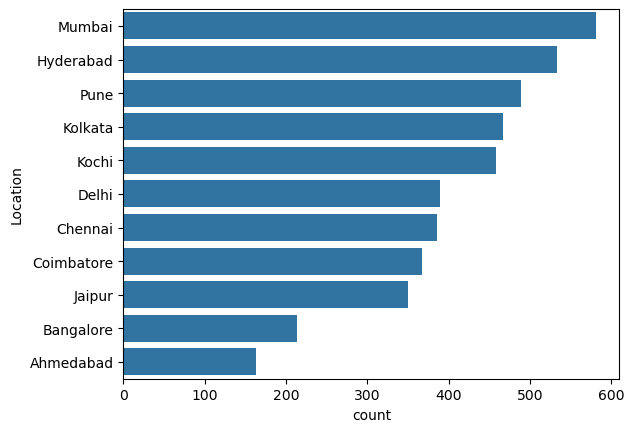

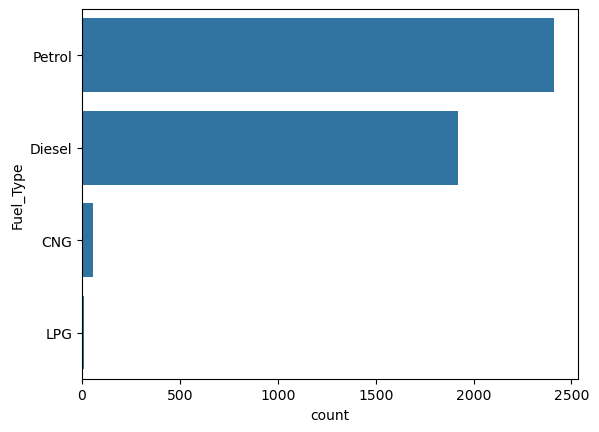

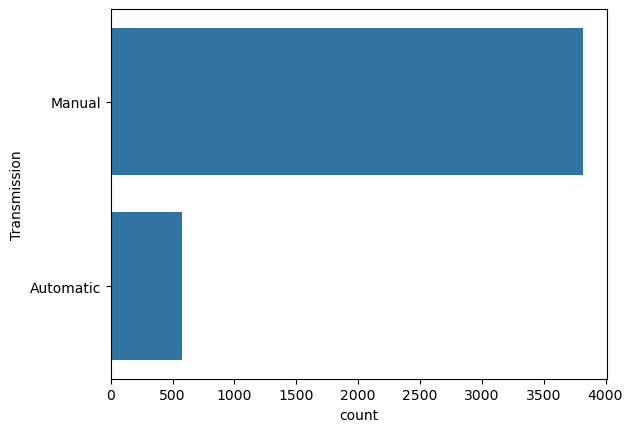

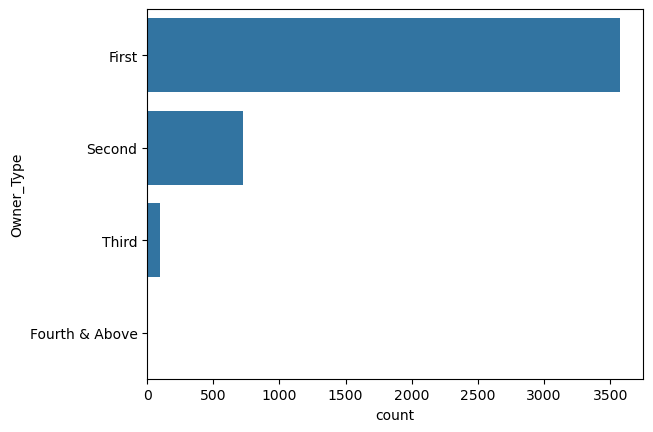

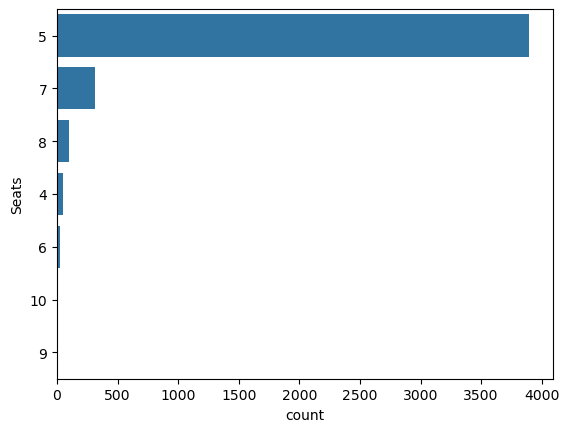

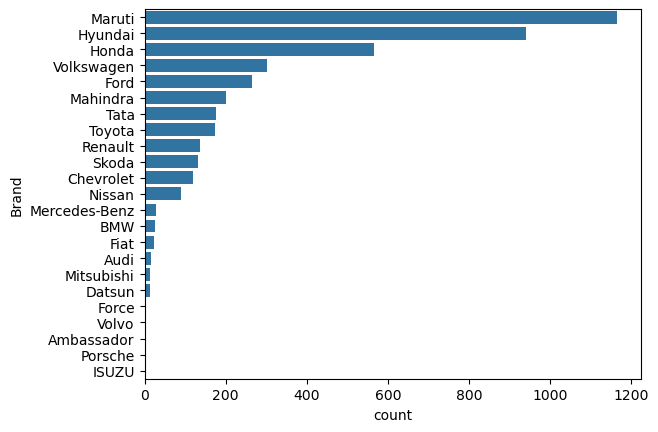

In [274]:
for col in cat_cols:
    sns.countplot(budget_df[col],order=budget_df[col].value_counts().index)
    plt.show()

# Analysis
These graphs show how categories like Brand, Fuel Type, Transmission, and Location are distributed.

We observe that Manual transmission and Petrol cars dominate the budget segment. A few brands contribute most of the cars, and the dataset is location-skewed toward metros.

Insight: The market for budget cars is tilted toward affordable, fuel-efficient vehicles. For modeling, categorical imbalance must be handled.

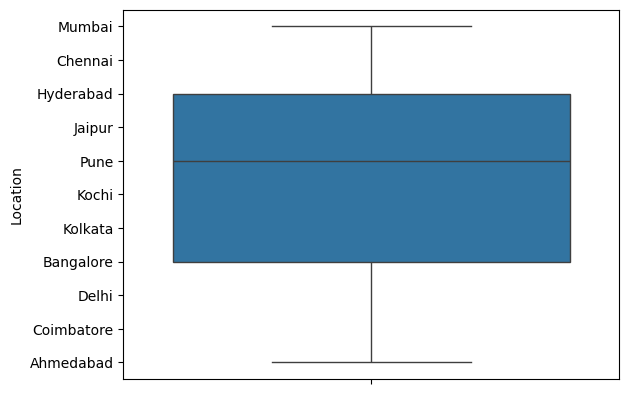

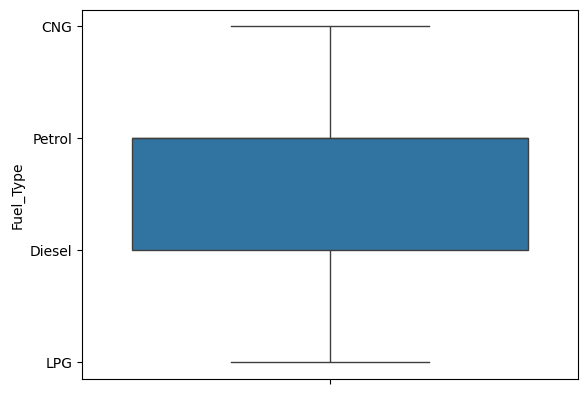

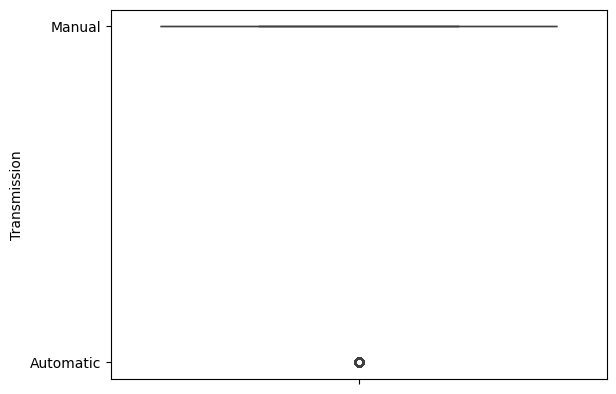

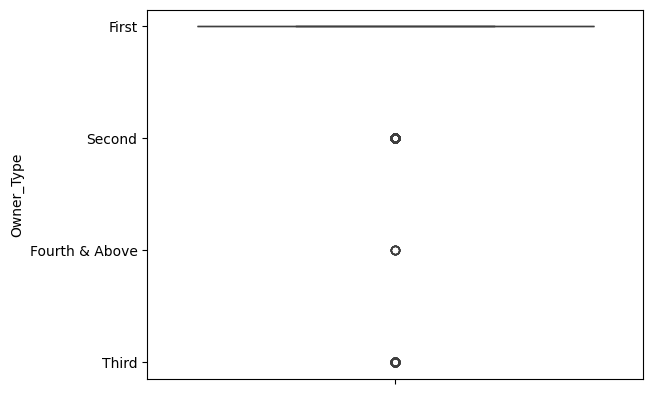

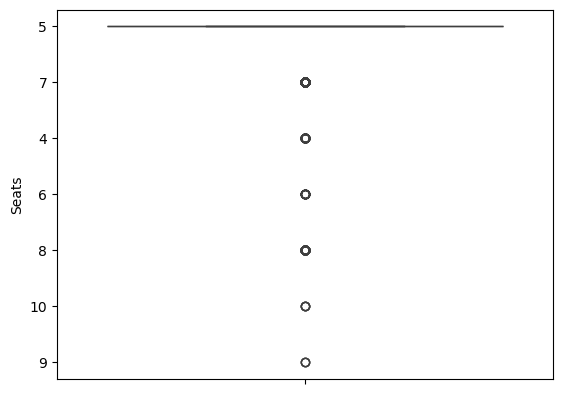

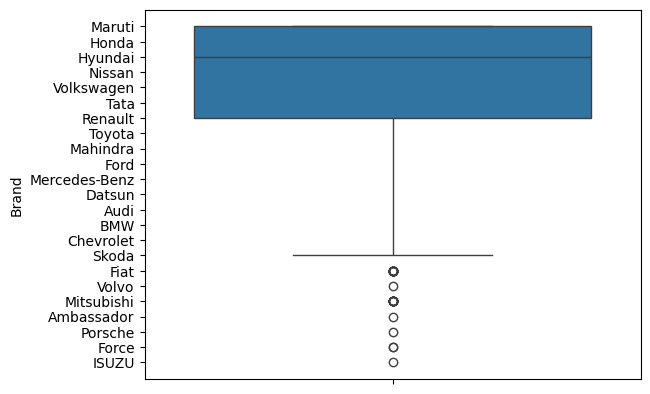

In [297]:
for clm in num_cols:
    sns.boxplot(budget_df[clm])
    plt.show()

In [298]:
for col in num_cols:
    Q1=budget_df[col].quantile(0.25)
    Q2=budget_df[col].quantile(0.5)
    Q3=budget_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    budget_df=budget_df[(budget_df[col]>=lower_bound) & (budget_df[col]<=upper_bound)]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

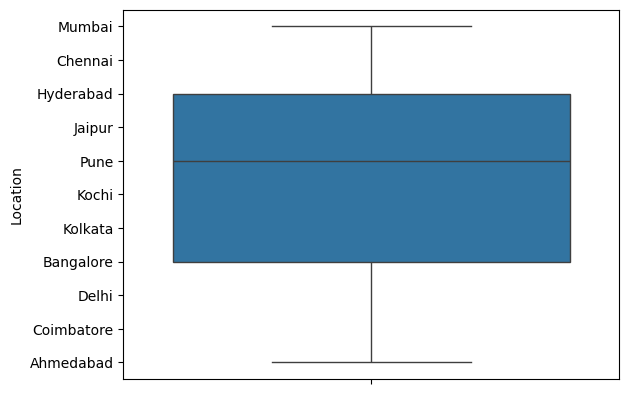

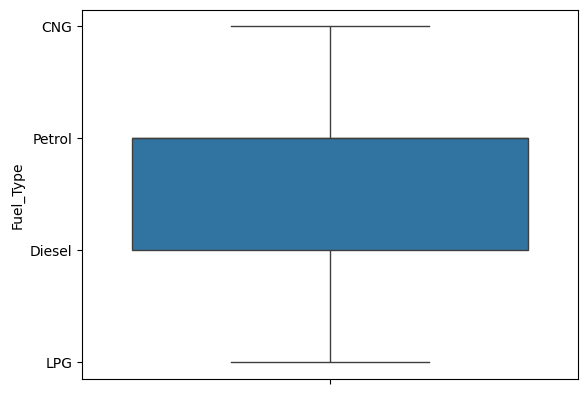

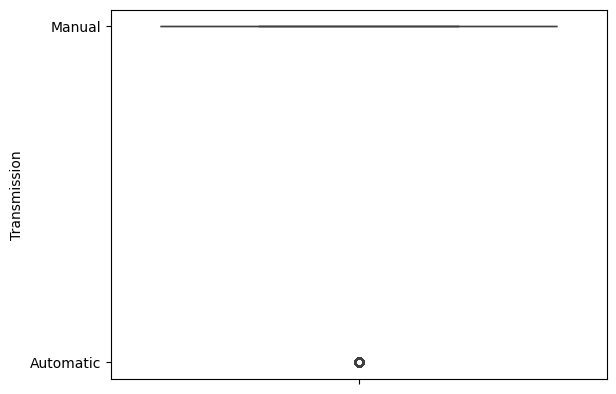

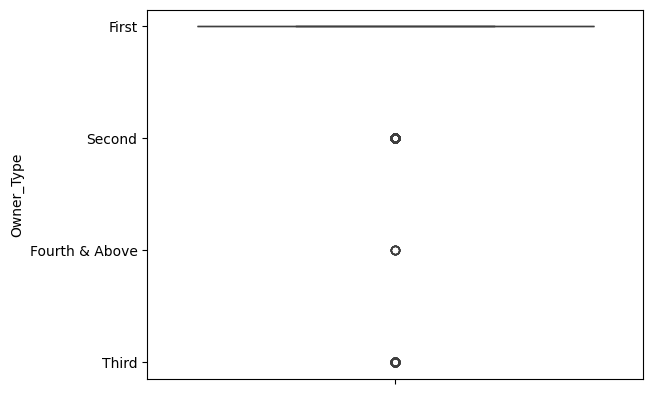

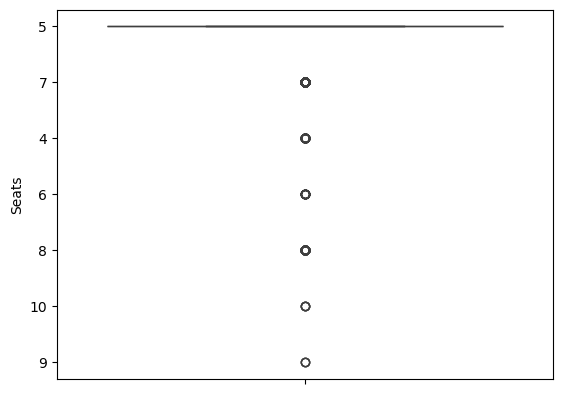

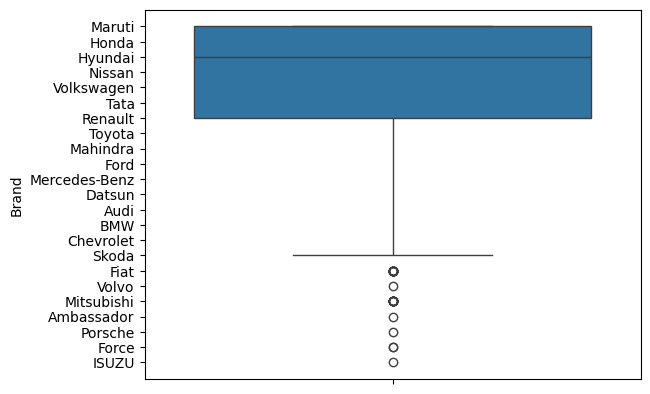

In [296]:
for col in  num_cols:
    sns.boxplot(budget_df[col])
    plt.show()

# Analysis
These plots summarize continuous variables such as Price, Mileage, Engine, Power, Kilometers Driven, and Car Age.

Mileage: Mostly concentrated around 18 kmpl, with very few extreme values.

Price, Engine, Power: Show many outliers with long upper tails.

Car Age: Cars range between 6 and 27 years.

Insight: Outliers in Price/Engine/Power can distort predictions. Transformations or capping are required.

# BIVARIATE EDA

<Figure size 1200x800 with 0 Axes>

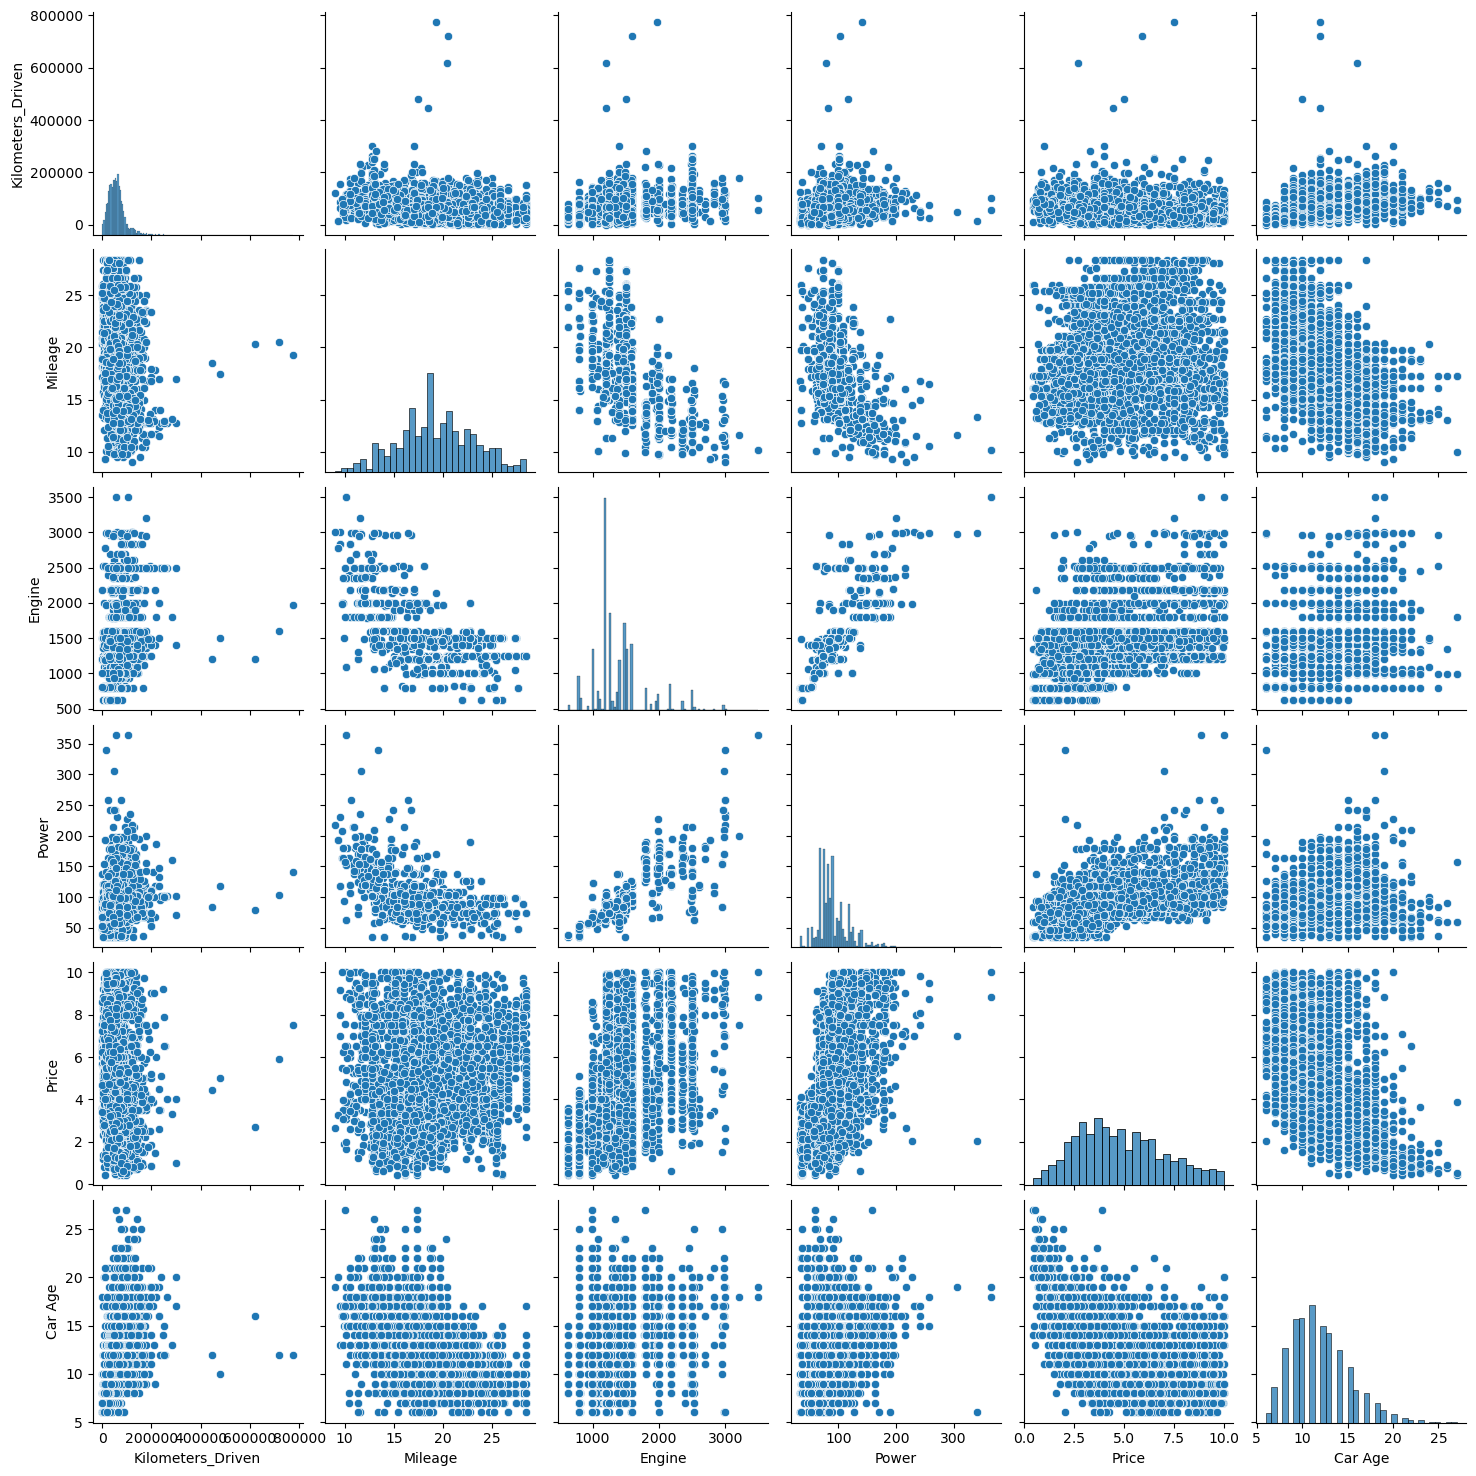

In [278]:
plt.figure(figsize = (12,8))
sns.pairplot(data = budget_df)
plt.show()

- Engine and Power show a strong positive link with Price, meaning bigger engines and higher performance usually raise car value.
- Mileage has a mild negative relation with Price, indicating fuel-efficient cars are often cheaper and less performance-focused.
- Car_Age and Kilometers_Driven show only weak patterns with Price, suggesting depreciation varies by model and usage.
- Price and Power distributions are right-skewed, with most cars in the lower range and a few premium models driving up the scale.
- Engine vs Power reflects a clear linear trend due to mechanical dependency.
- Mileage vs Power highlights a trade-off—powerful cars tend to consume more fuel.
- Car_Age vs Kilometers_Driven has a positive relationship, though with noticeable variation in driving habits.

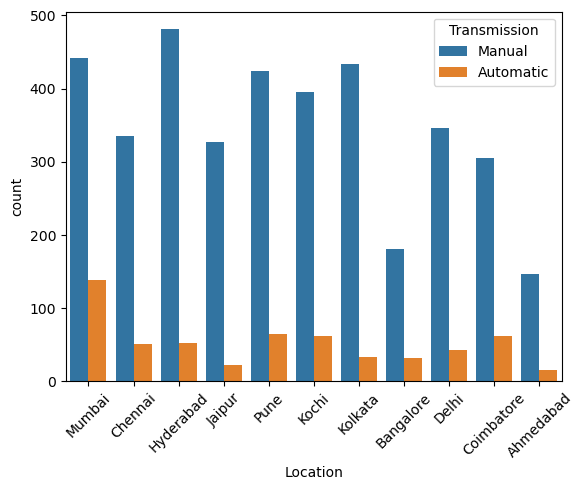

In [279]:
sns.countplot(data =budget_df, x = budget_df["Location"], hue = "Transmission")
plt.xticks(rotation = 45)
plt.show()

# Analysis
Compares Transmission types across Locations.

Manual dominates across most cities, while Automatics are concentrated in metro locations.

Insight: Location plays a role in preference; Manual cars are a safe choice for budget buyers, Automatics appeal more to urban customers.

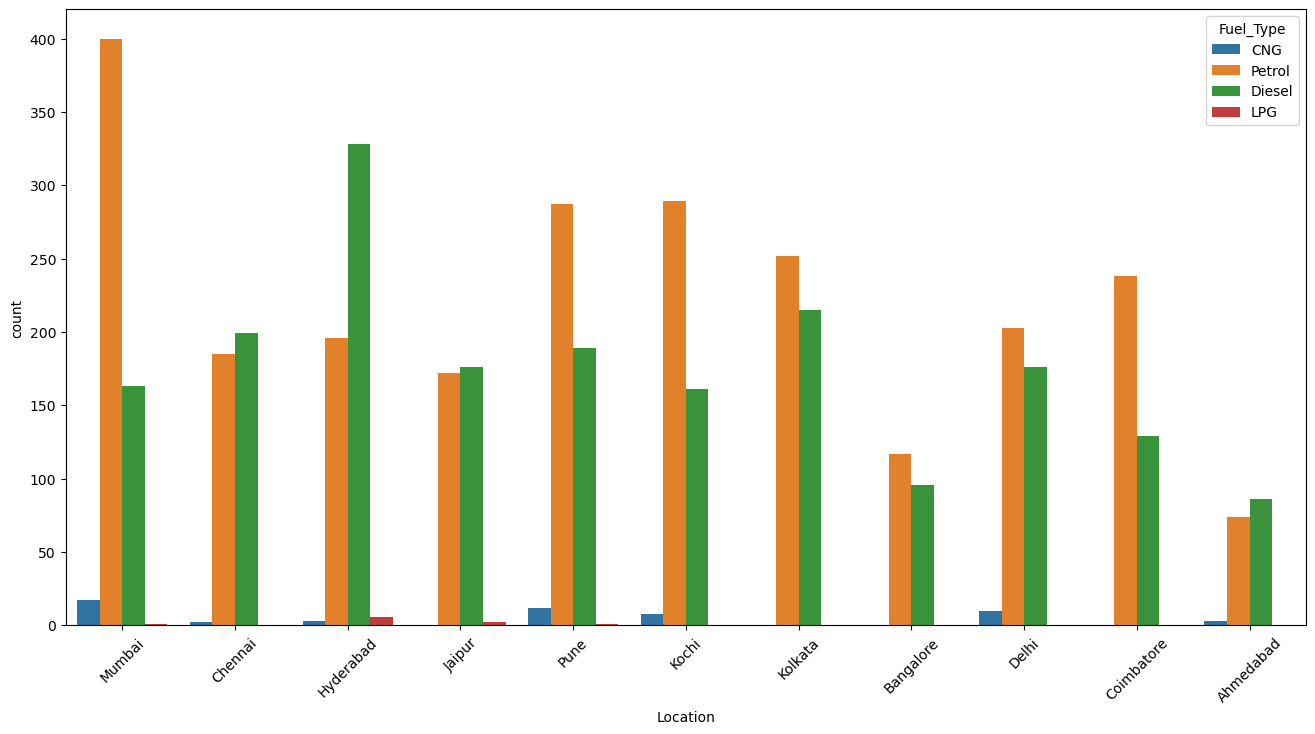

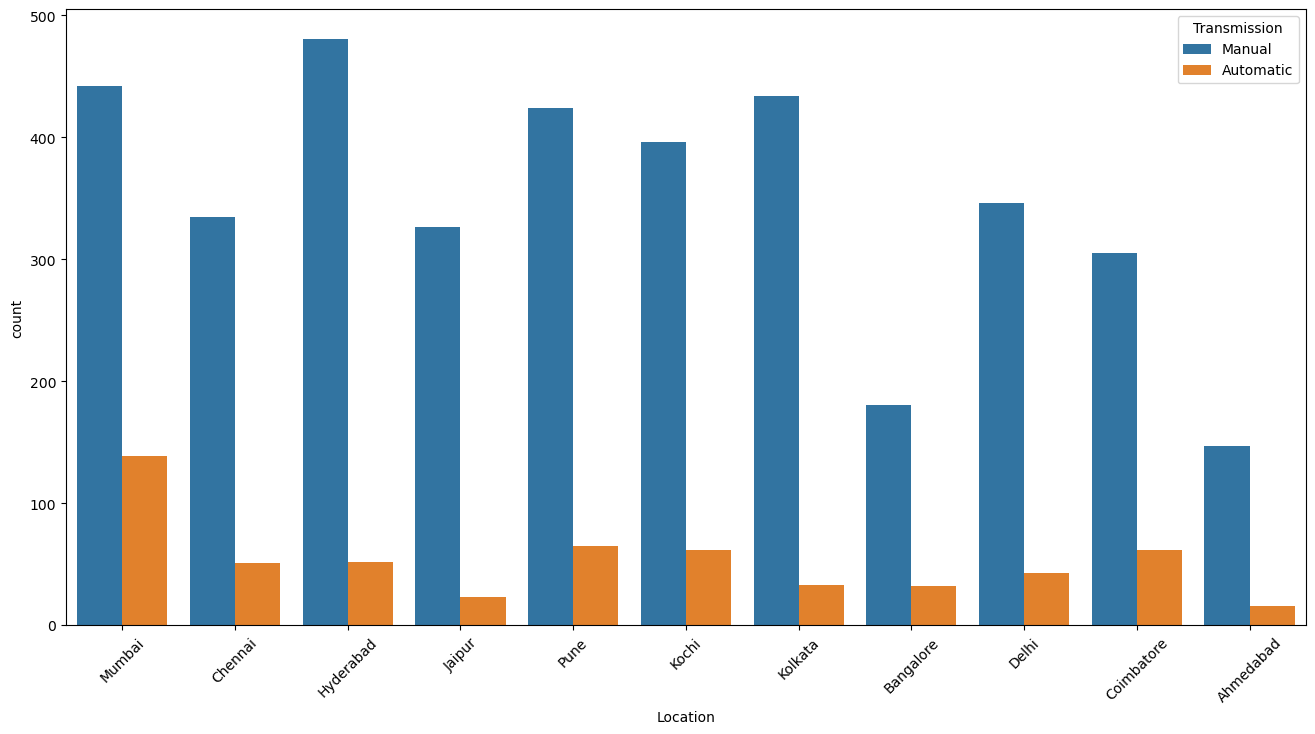

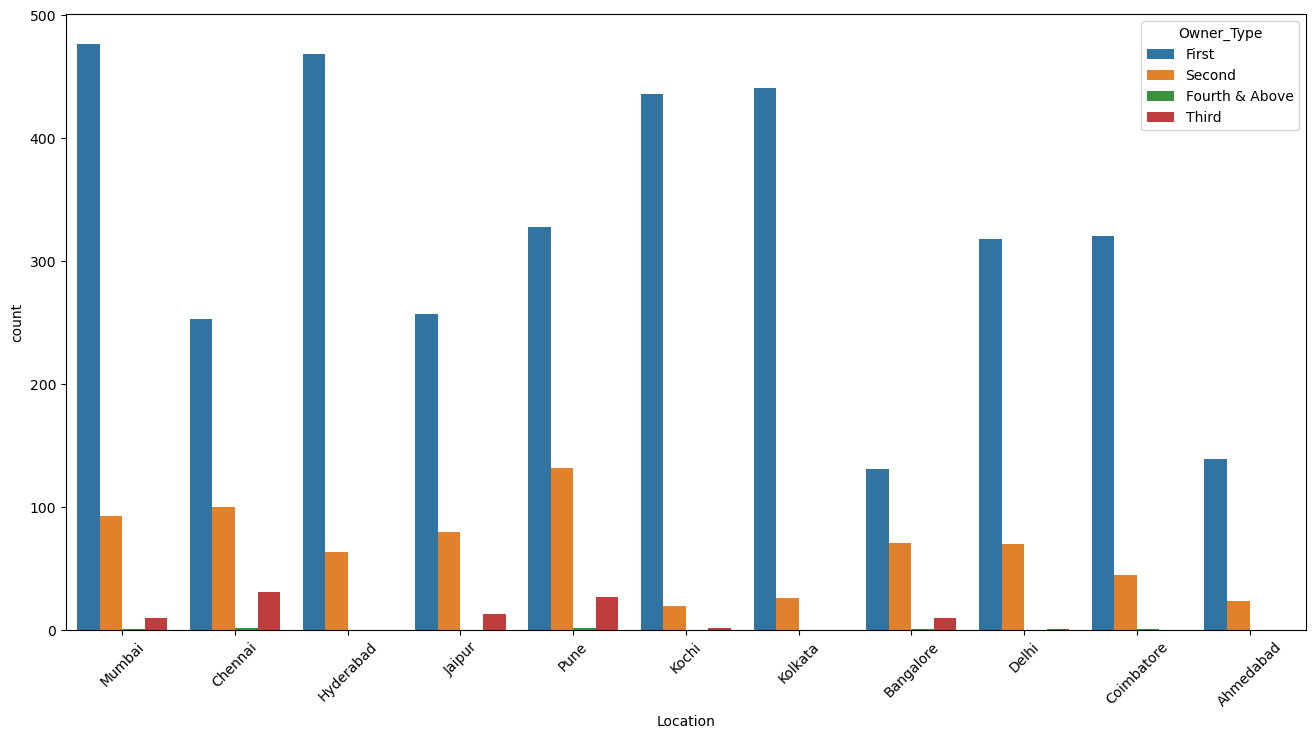

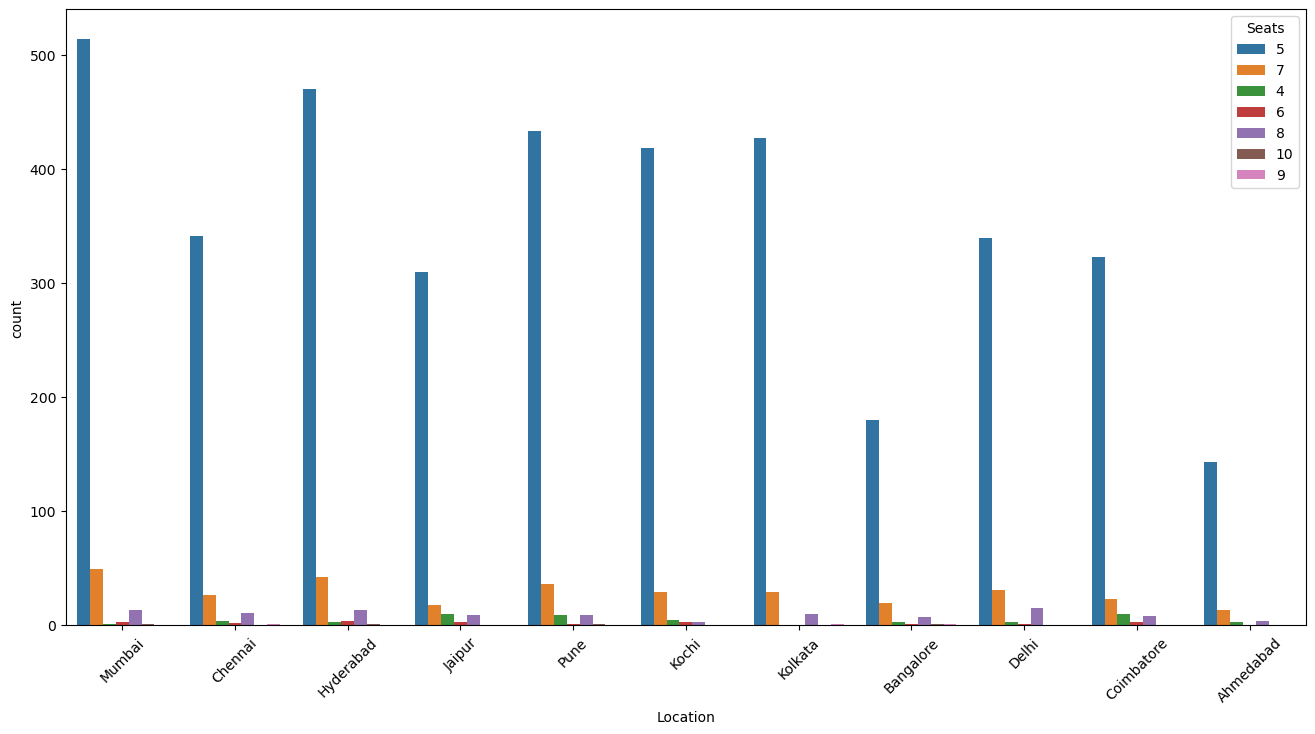

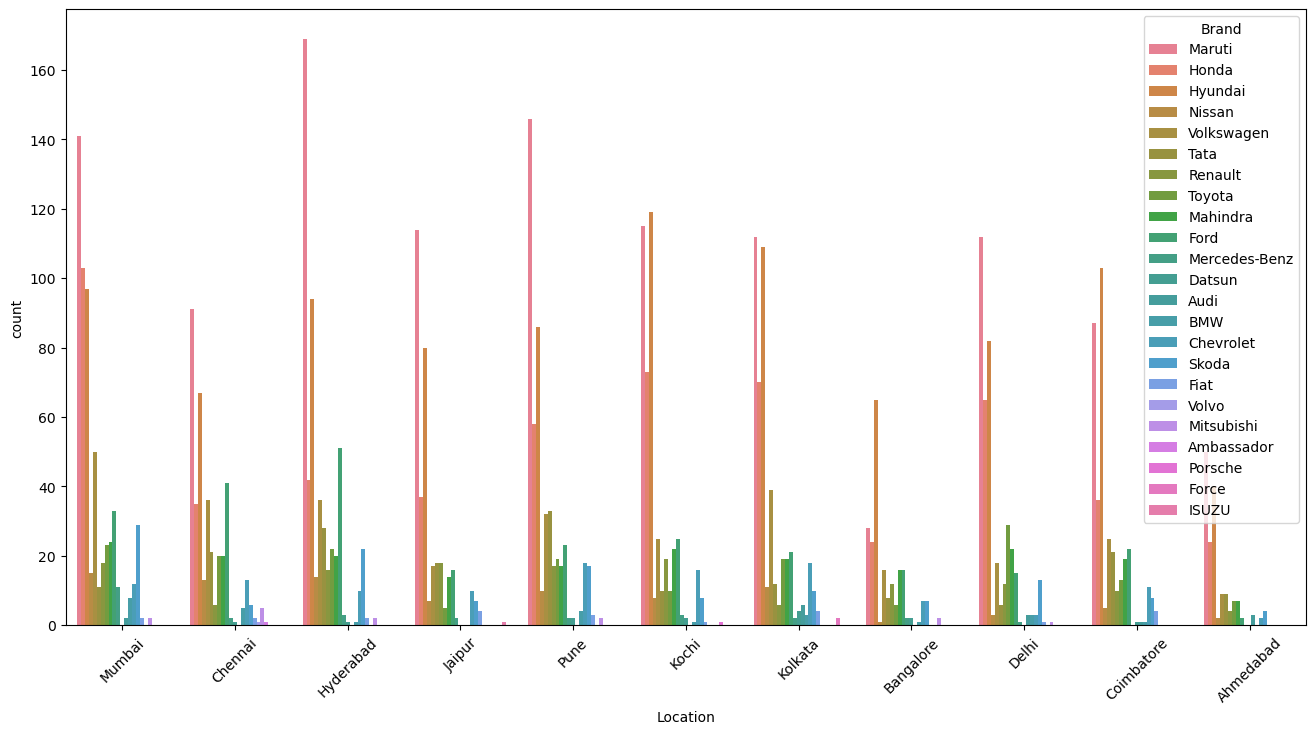

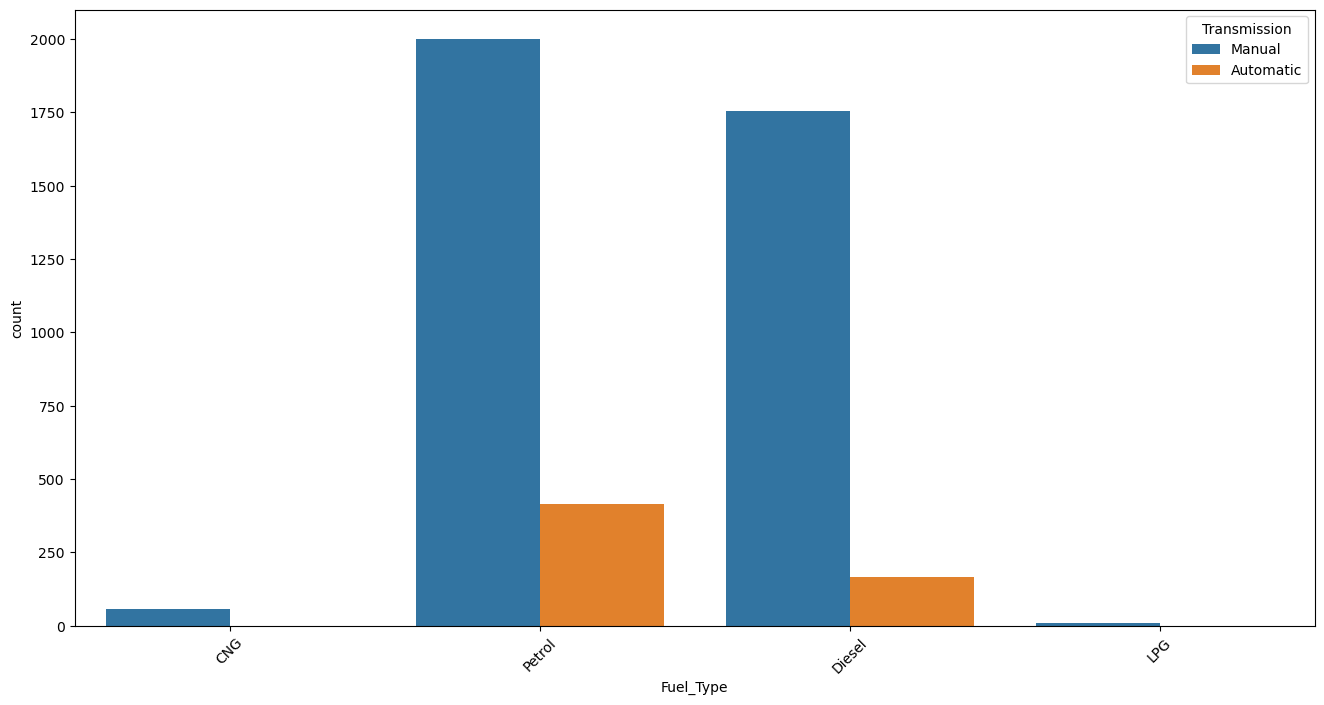

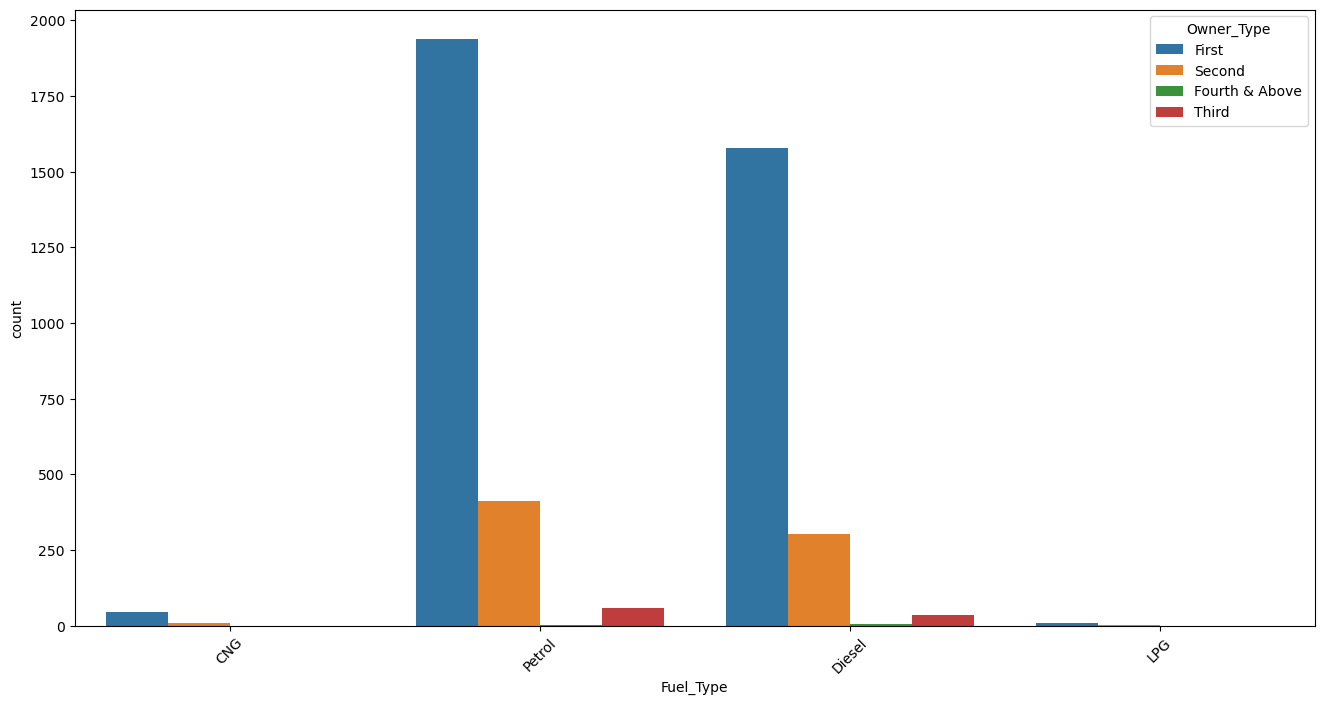

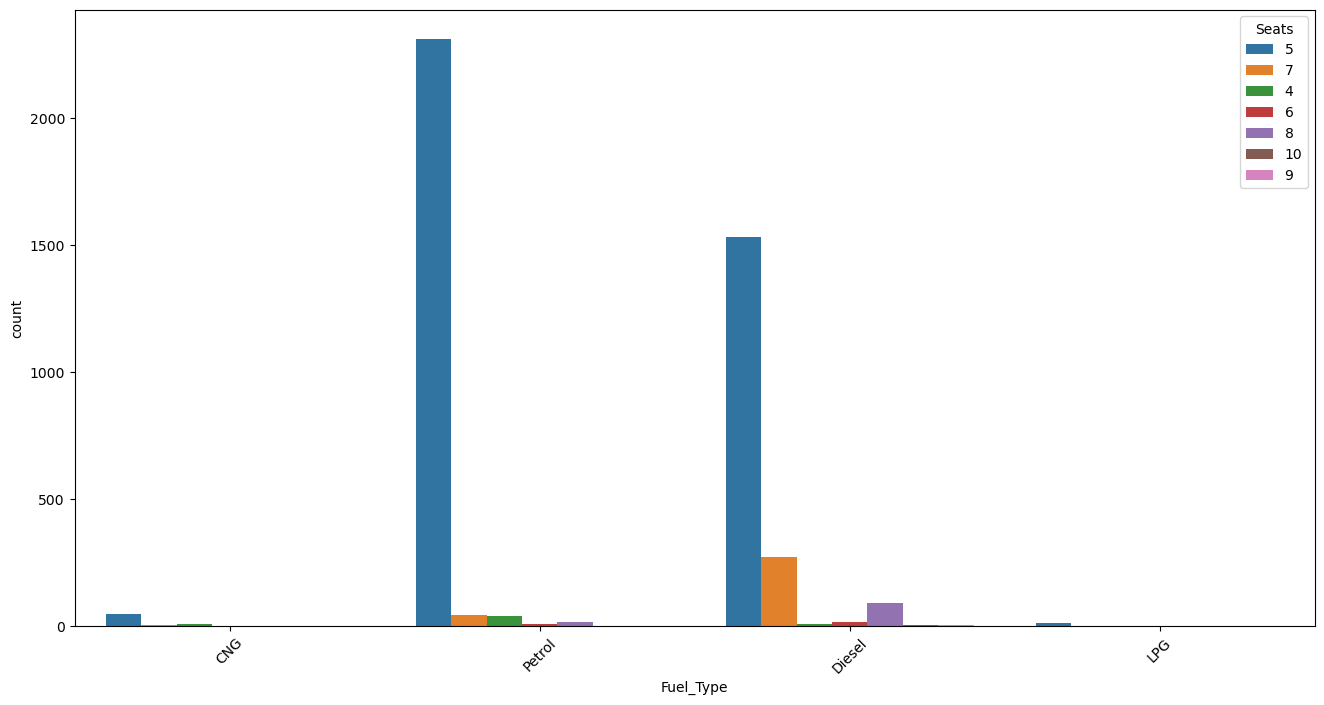

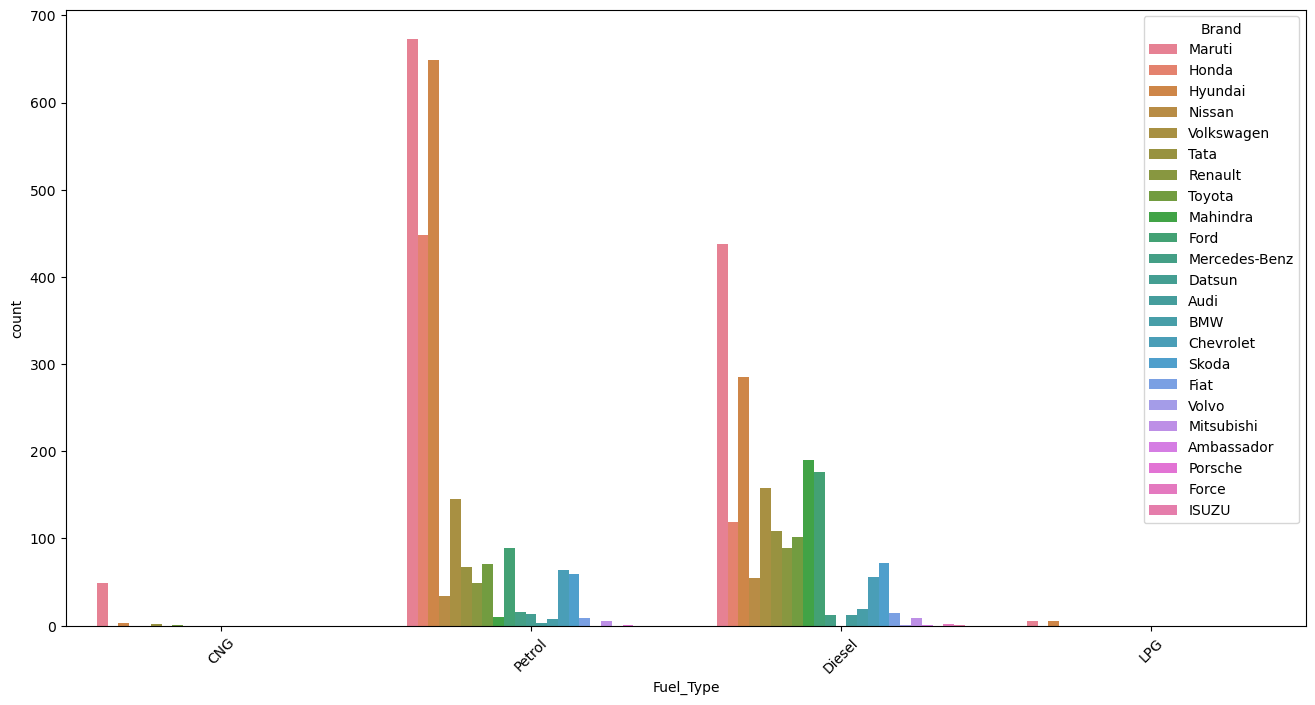

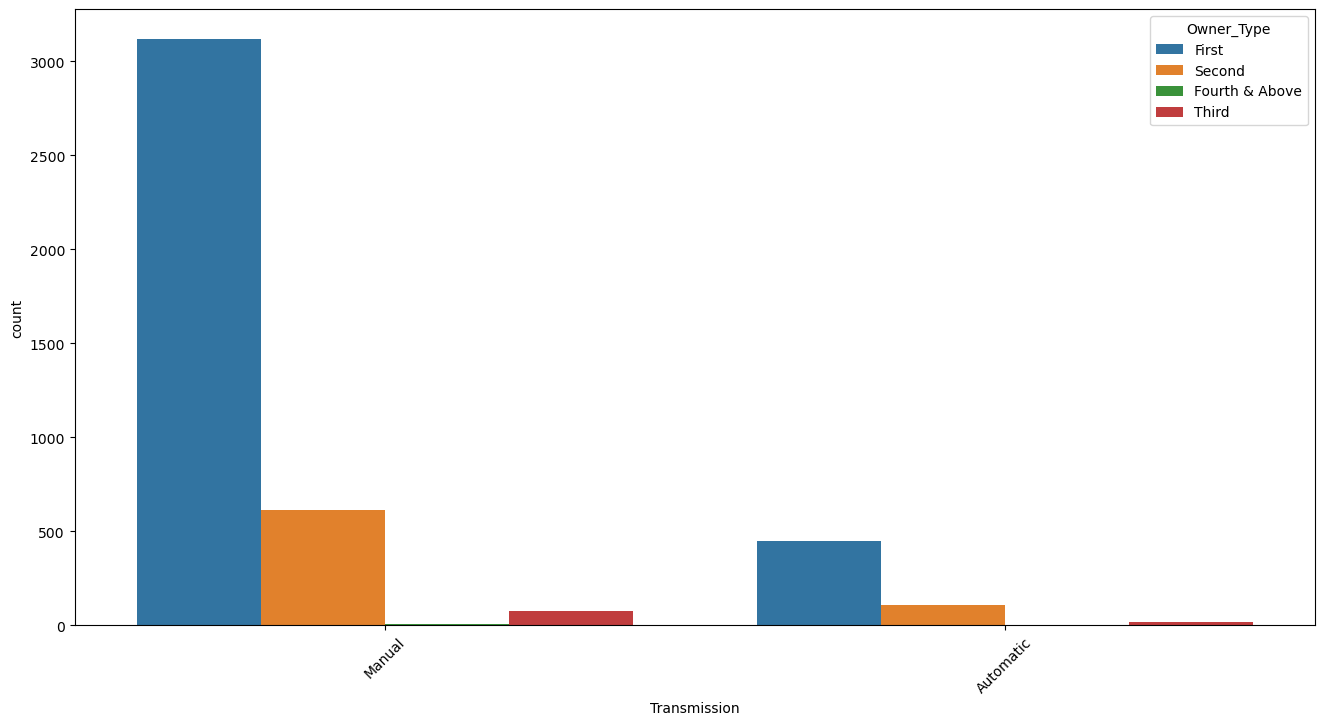

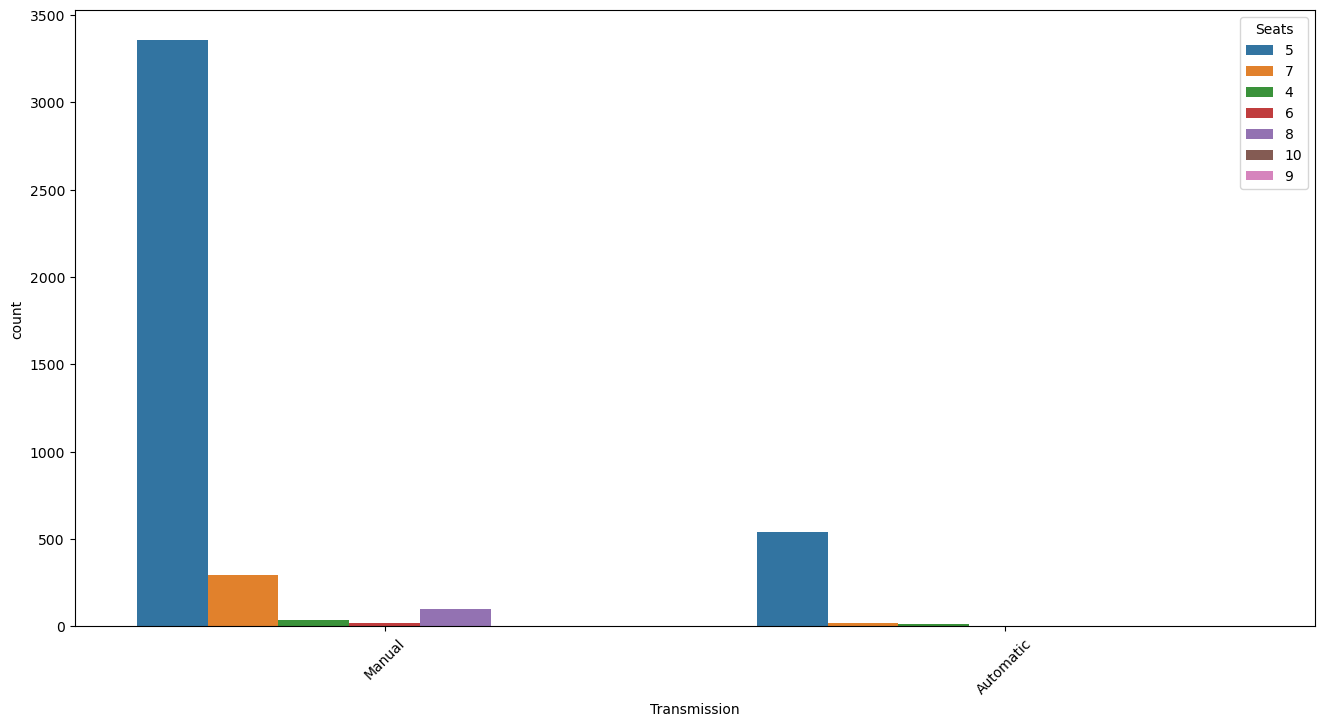

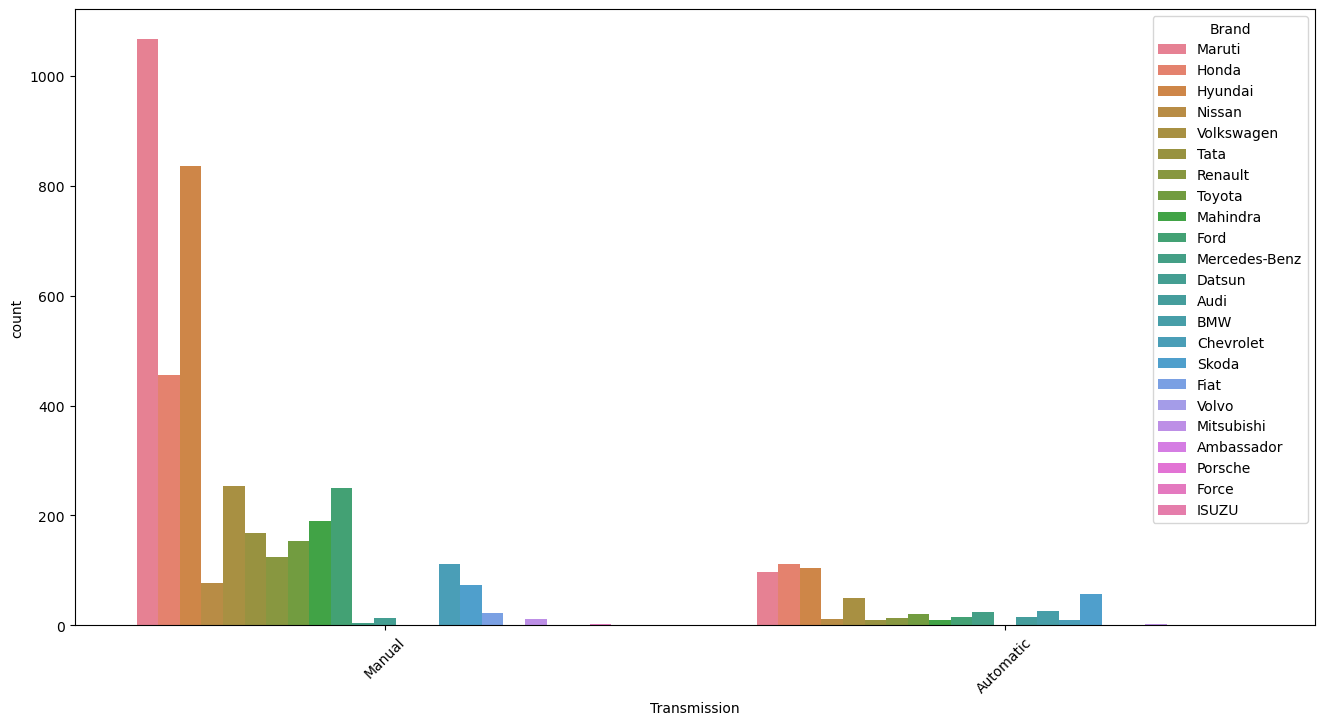

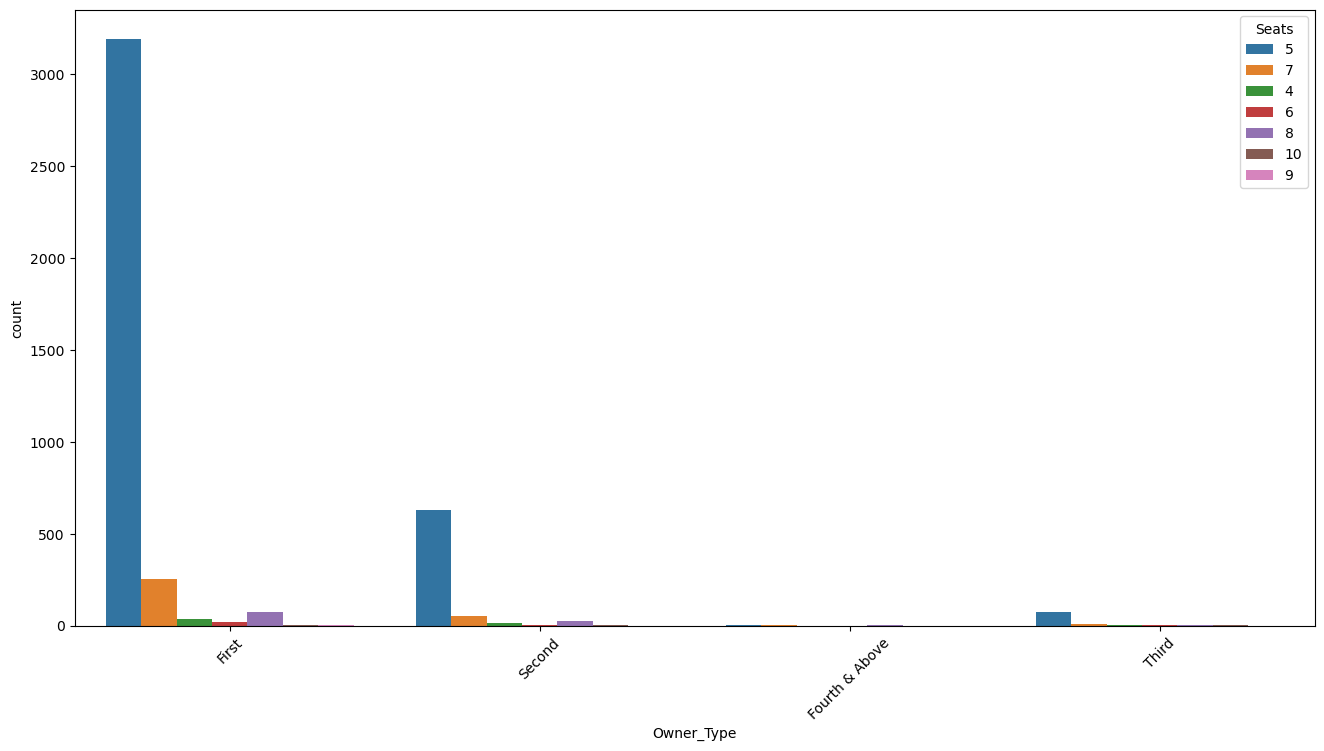

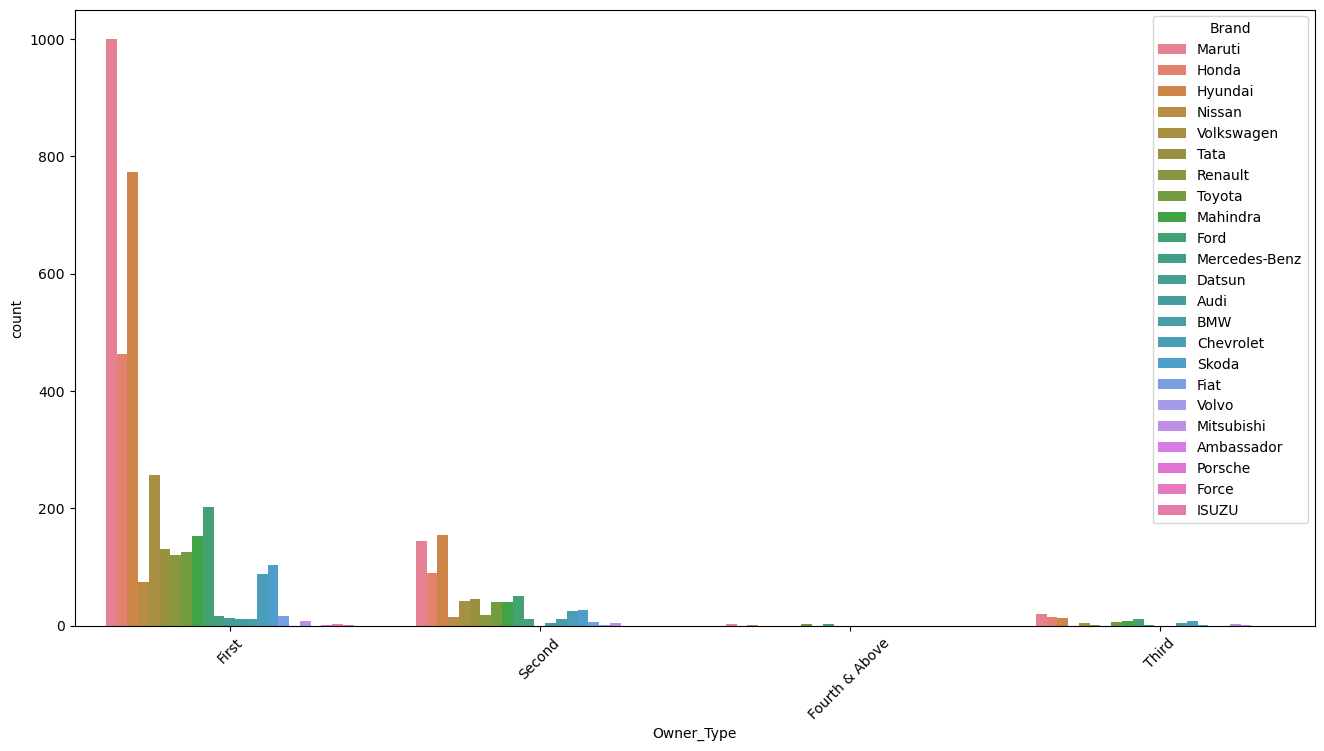

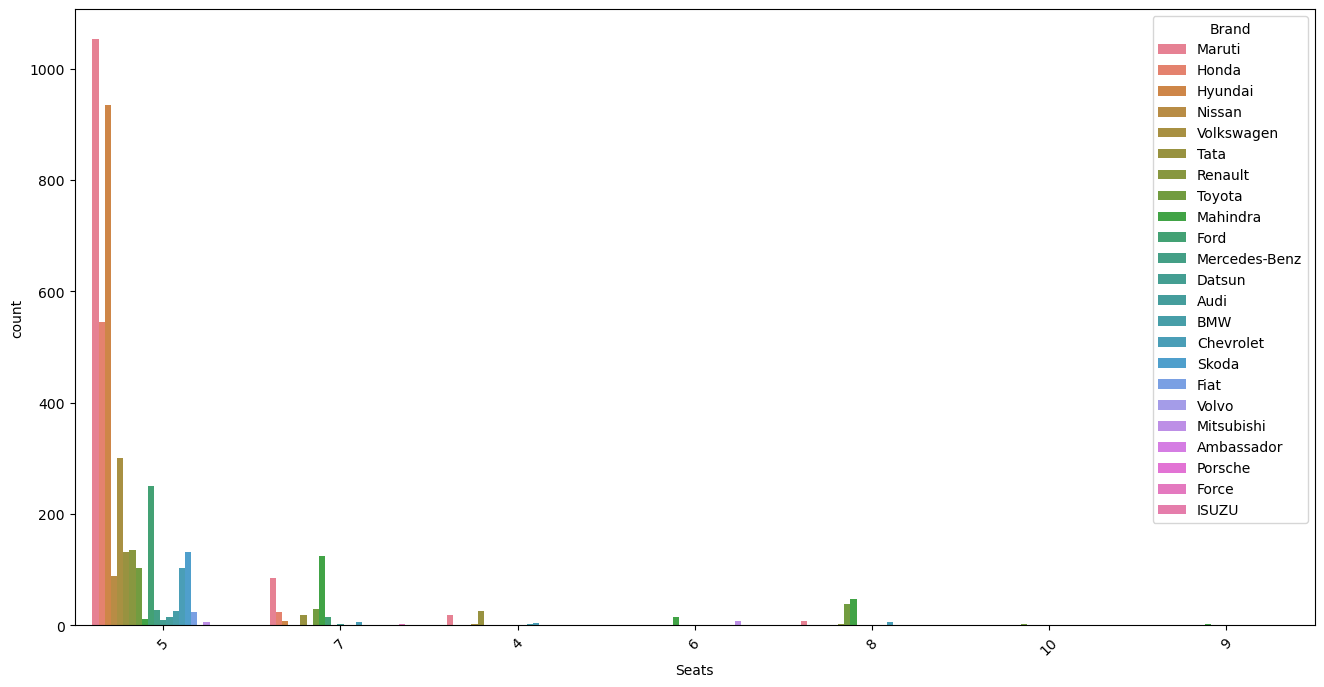

In [280]:
list1=[]
count=0
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1==col2 or (col1,col2) in list1 or (col2,col1) in list1:
            continue
        else:
            plt.figure(figsize=(16,8))
            sns.countplot(data=budget_df,x=budget_df[col1],hue=budget_df[col2])
            list1.append((col1,col2))
            plt.xticks(rotation=45)
            plt.show()
            count+=1

# Analysis
Cross-plots like Fuel vs Transmission, Brand vs Fuel, etc.

Many brands stick to Petrol + Manual, while Diesel appears in higher-end brands.

Insight: Certain category combinations dominate the dataset. This shows customer tendencies and helps in targeted marketing.

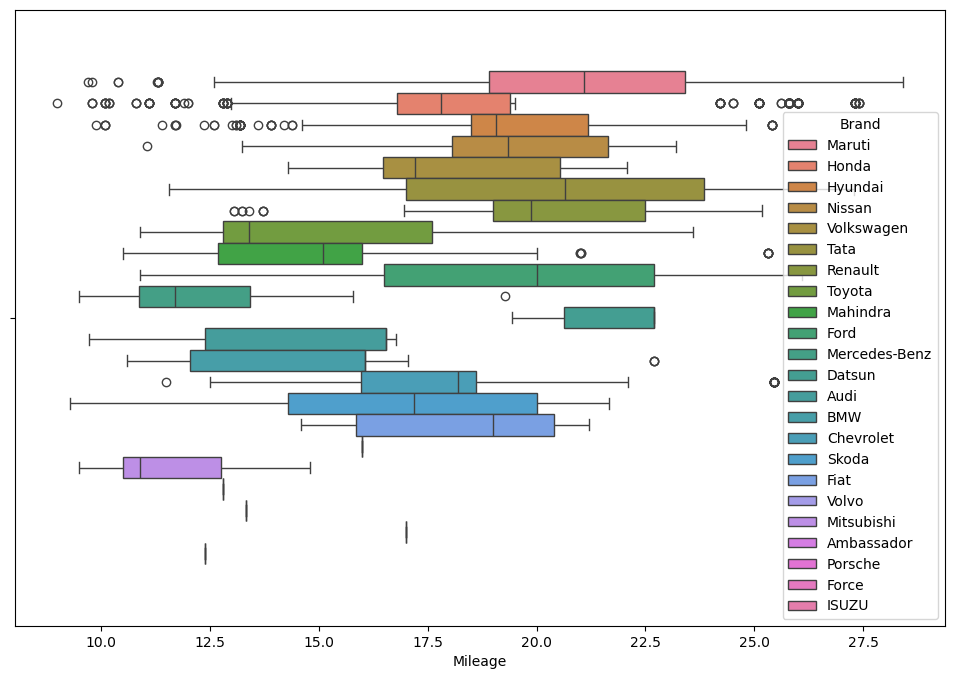

In [281]:
plt.figure(figsize=(12,8))
sns.boxplot(data = budget_df, x = budget_df["Mileage"], hue = "Brand")
plt.show()

# Analysis
Shows mileage distribution across brands.

Japanese brands tend to deliver higher mileage, while some luxury-leaning brands show poor efficiency.

Insight: Brand perception is reinforced by performance metrics — buyers can be segmented by “efficiency seekers vs premium seekers.”

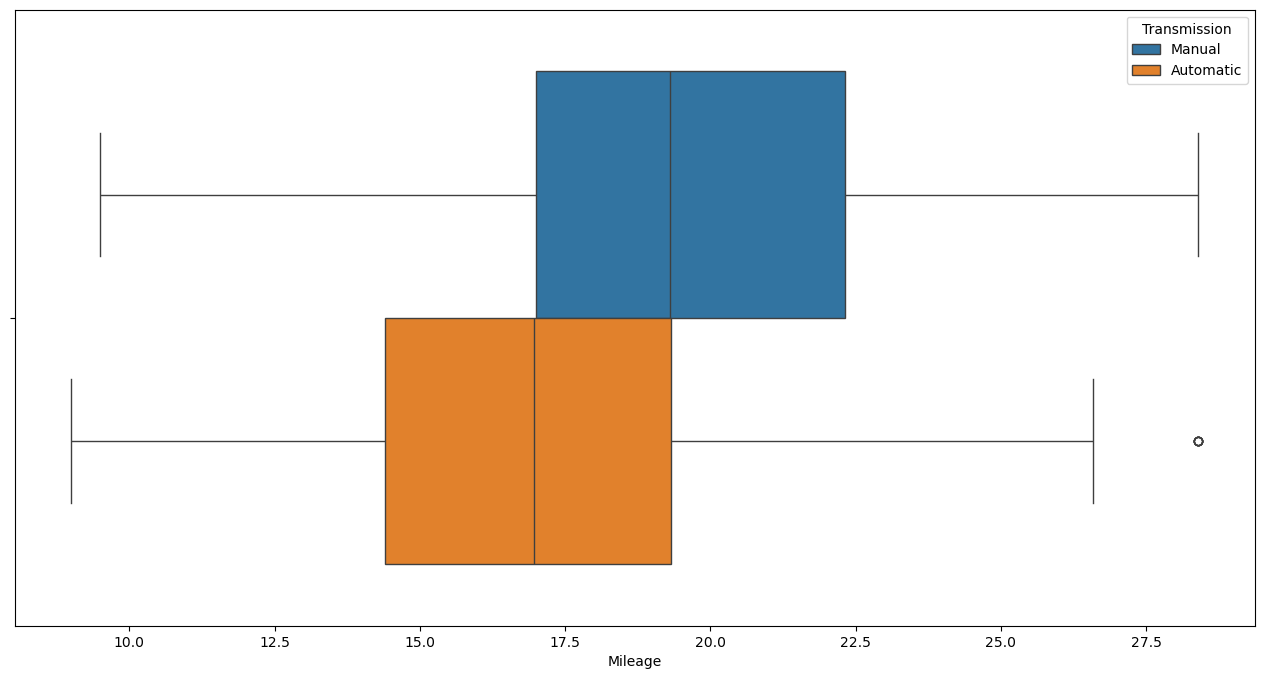

In [282]:
plt.figure(figsize=(16,8))
sns.boxplot(data=budget_df,x=budget_df["Mileage"],hue="Transmission")
plt.show()

# Analysis
Compares mileage across Manual vs Automatic cars.

Manual cars give higher mileage, Automatics lower mileage but better comfort.

Insight: Useful for marketing: Manuals appeal to budget-sensitive buyers, Automatics to convenience seekers.

# bivariate ananlytics include 3 types-
- numerical vs numerical - scatter plot(it is used to show the relationship between 2 continous variables)
  pairplot(matrix of scatter plot for multiple numerical columns)
- categorical vs categorical - groupedbarplot(used hue in countplot to create grouped barplot)
  stacked barplot(create frequency table and then plotted using pandas)
- numerical vs categorical - boxplot(hue) and violenplot  
  

In [283]:
crosstab = pd.crosstab(budget_df["Location"], budget_df["Transmission"])
crosstab

Transmission,Automatic,Manual
Location,,
Ahmedabad,16,147
Bangalore,32,181
Chennai,51,335
Coimbatore,62,305
Delhi,43,346
Hyderabad,52,481
Jaipur,23,327
Kochi,62,396
Kolkata,33,434


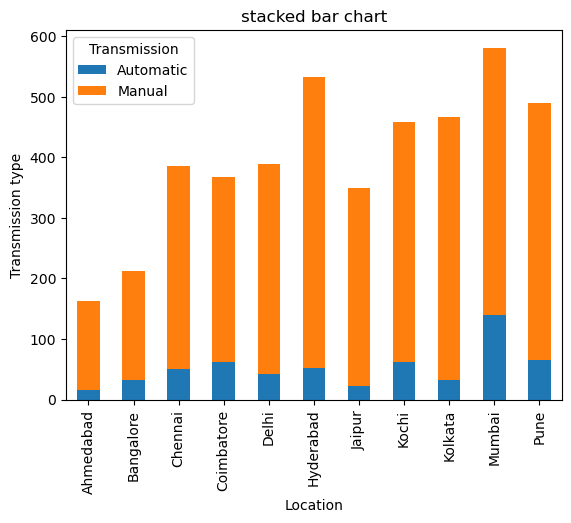

In [284]:
crosstab.plot(kind = "bar", stacked= True)
plt.title("stacked bar chart")
plt.xlabel("Location")
plt.ylabel("Transmission type")
plt.show()

# Analysis
A stacked visualization of categorical interactions.

Helps compare proportions, e.g., how different fuel types stack within brands.

Insight: Highlights overlaps among categories, making it clear which combinations dominate the market.

In [285]:
cat_col_lux=luxury_df.select_dtypes(include=['object']).columns.tolist()
num_col_lux=luxury_df.select_dtypes(exclude=['object']).columns.tolist()
cat_col_lux,num_col_lux


(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand'],
 ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car Age'])

In [286]:
luxury_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,1448.0,56517.360497,172680.684083,1000.00,29889.25,47000.00,67103.75,6500000.00
Mileage,1448.0,15.369800,3.384346,6.40,12.80,15.00,17.68,27.03
Engine,1448.0,2302.858425,590.248106,1248.00,1968.00,2143.00,2755.00,5998.00
Power,1448.0,179.490497,56.836710,87.20,140.80,174.33,191.34,560.00
Price,1448.0,23.894081,14.726358,10.05,13.50,19.00,29.50,160.00
Car Age,1448.0,10.369475,2.524152,6.00,8.00,10.00,12.00,19.00


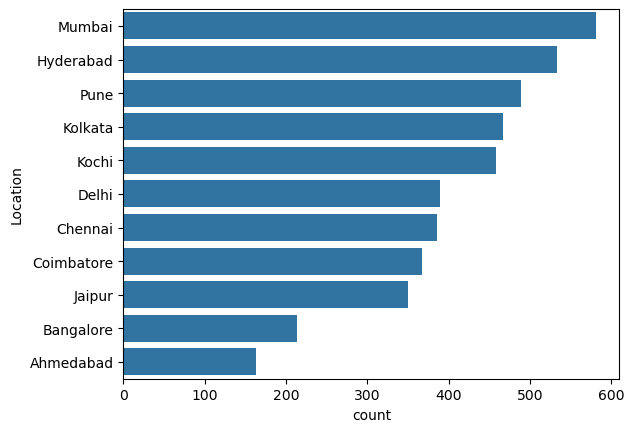

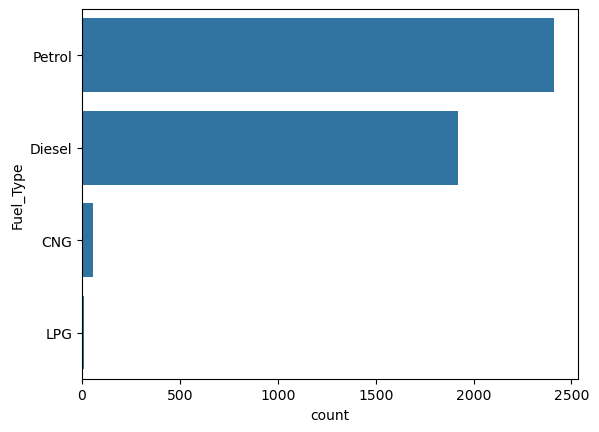

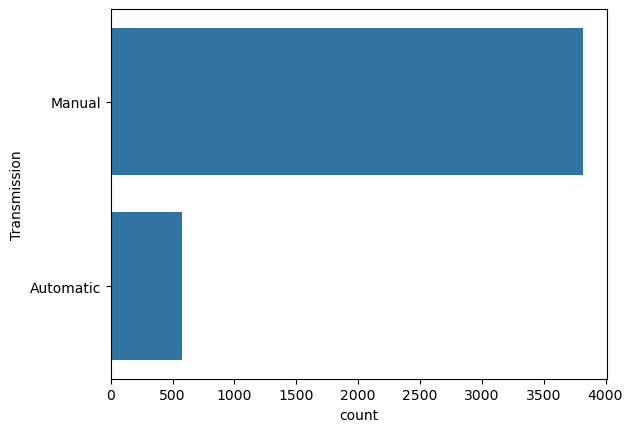

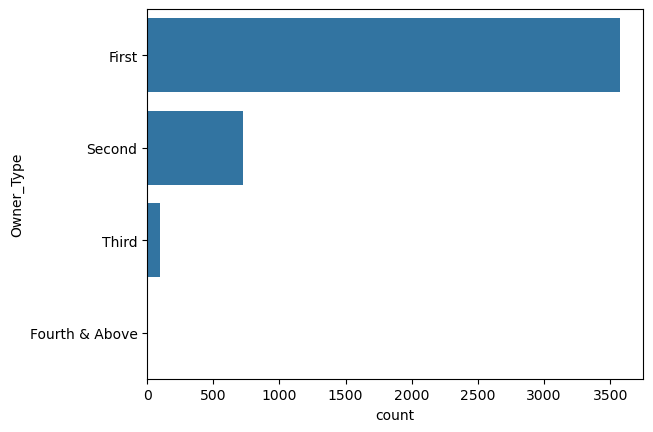

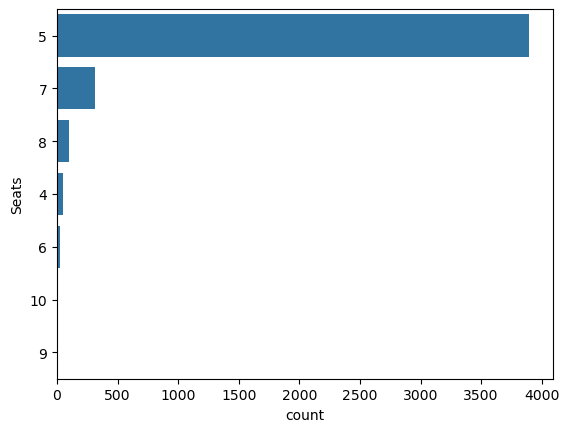

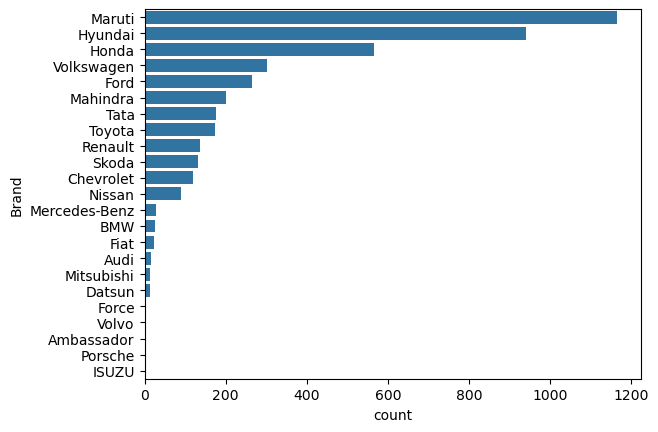

In [287]:
for col in cat_col_lux:
    sns.countplot(budget_df[col],order=budget_df[col].value_counts().index)
    plt.show()

# Analysis
Similar to budget car plots but for luxury cars.

Here, Automatic and Petrol/Diesel dominate, and fewer brands capture the luxury segment.

Insight: Luxury market is less diverse but heavily tilted toward high-end brands and Automatics.

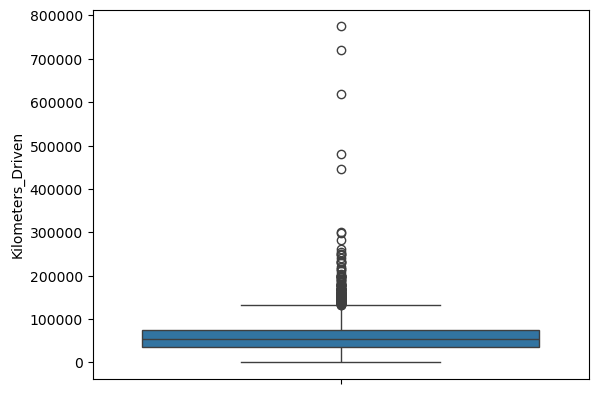

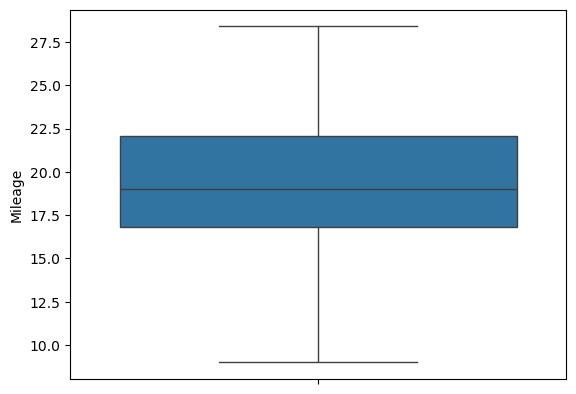

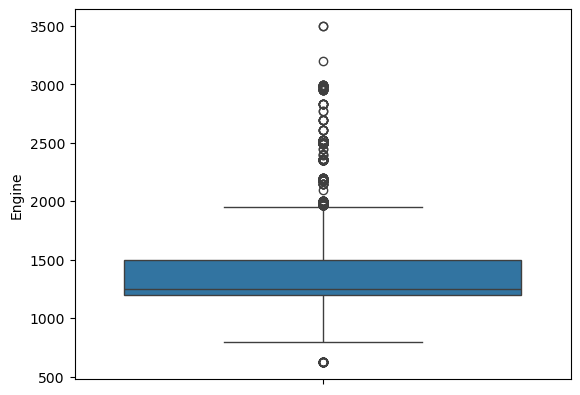

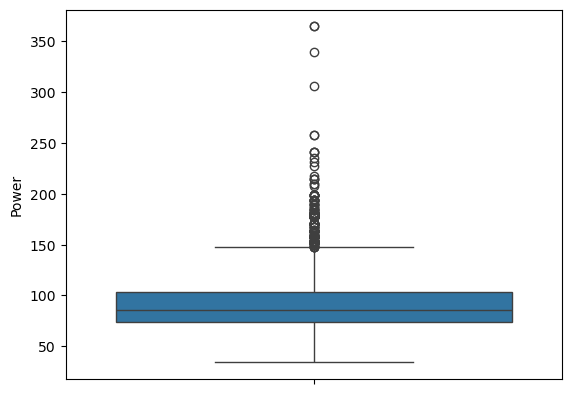

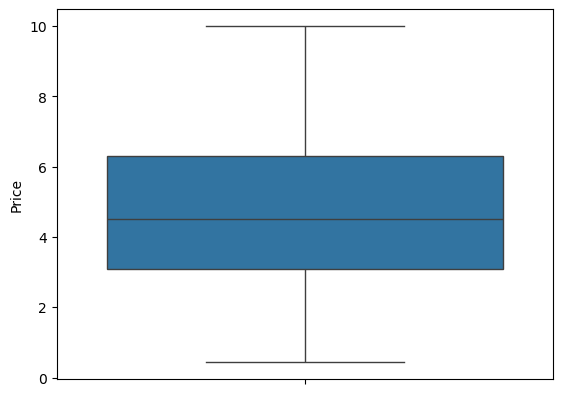

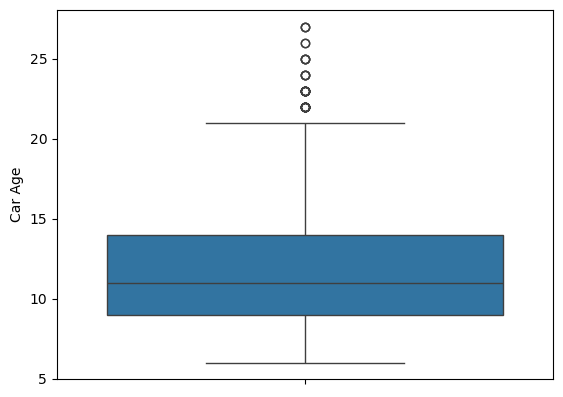

In [288]:
for col in num_col_lux:
    sns.boxplot(budget_df[col])
    plt.show()

In [289]:
for col in num_col_lux:
    Q1=luxury_df[col].quantile(0.25)
    Q2=luxury_df[col].quantile(0.5)
    Q3=luxury_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    luxury_df=luxury_df[(luxury_df[col]>=lower_bound) & (luxury_df[col]<=upper_bound)]

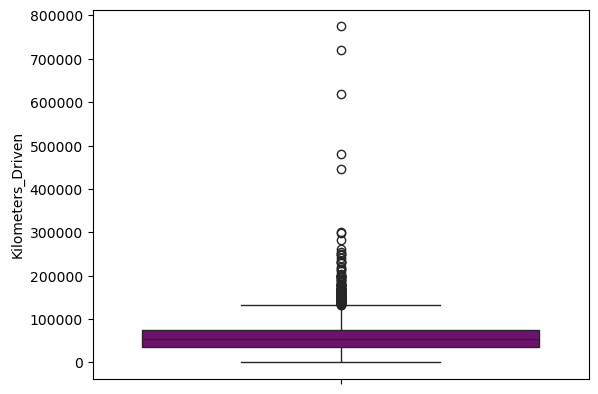

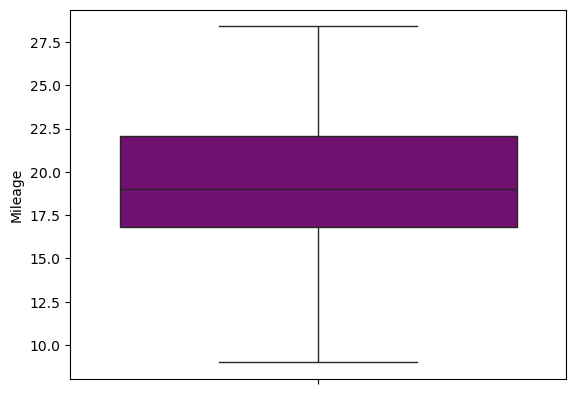

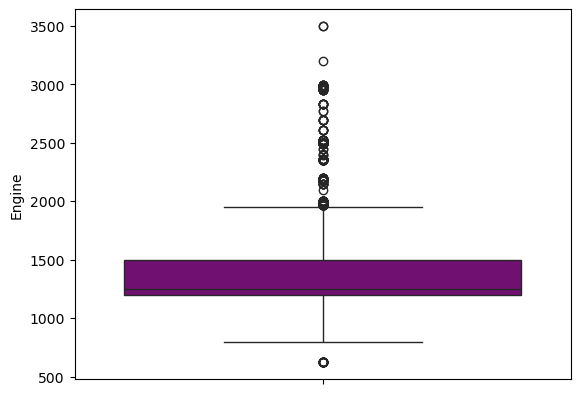

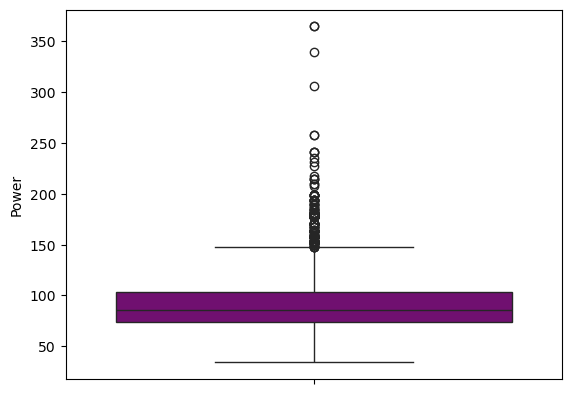

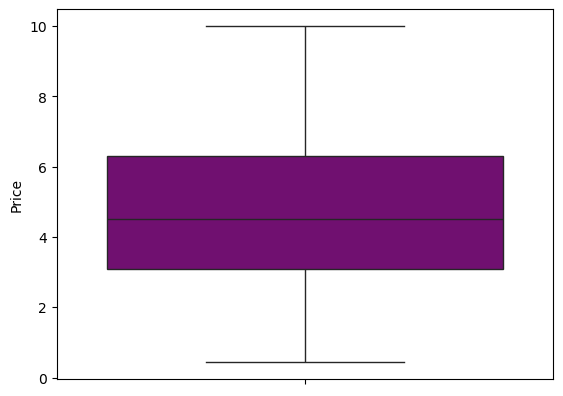

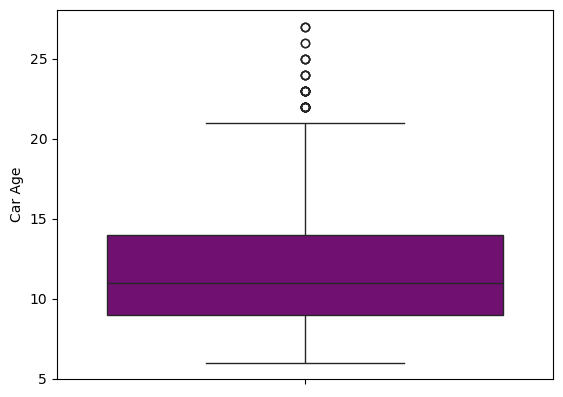

In [290]:
for col in num_col_lux:
    sns.boxplot(budget_df[col],color="Purple")
    plt.show()

# Analysis
Luxury cars’ numerical attributes (Price, Engine, Power) show extreme values.

Prices span very high ranges, Engines and Power are significantly larger than budget cars.

Insight: Luxury cars cannot be modeled together with budget cars; distributions differ too much.

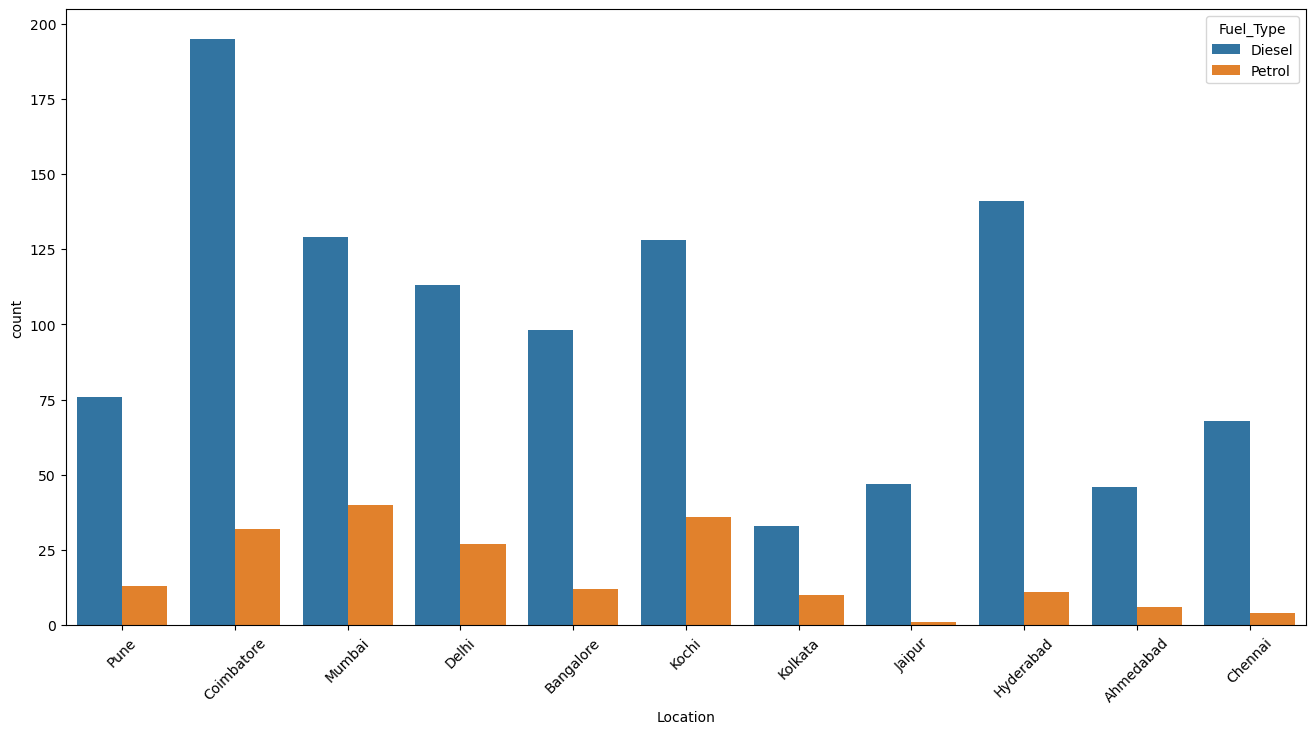

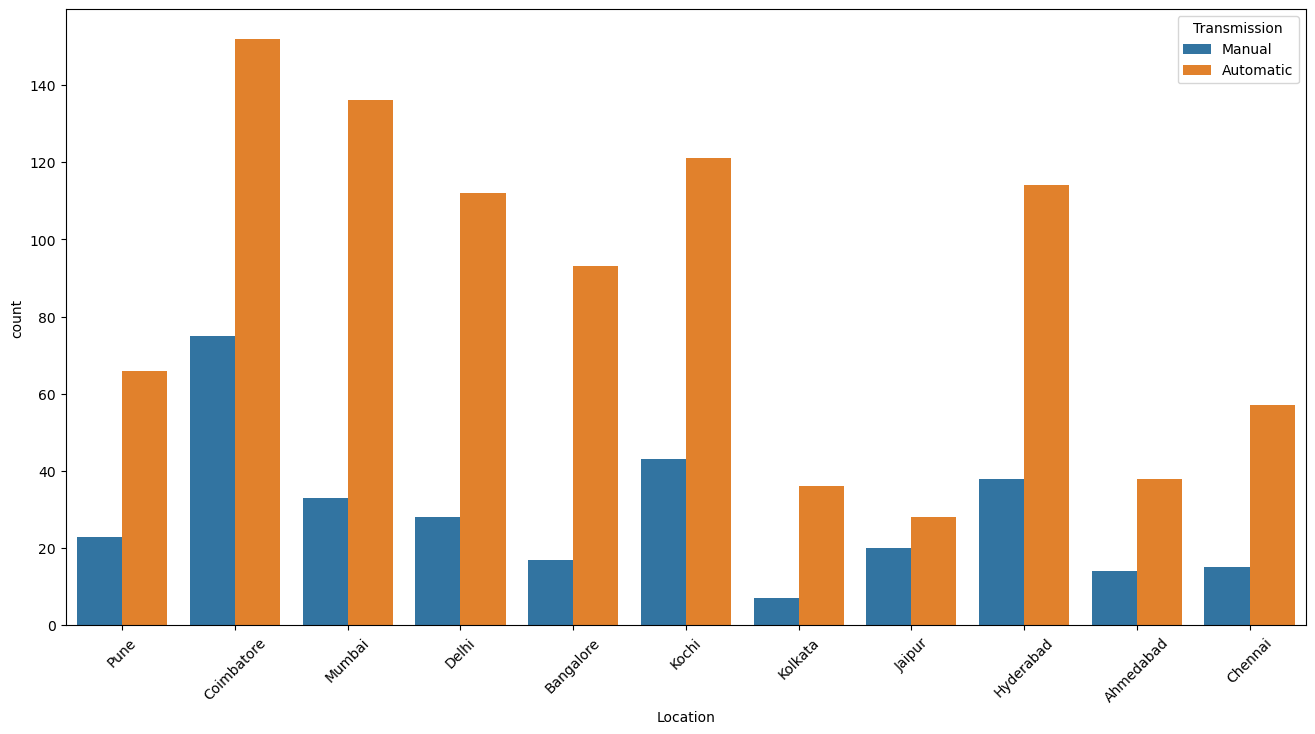

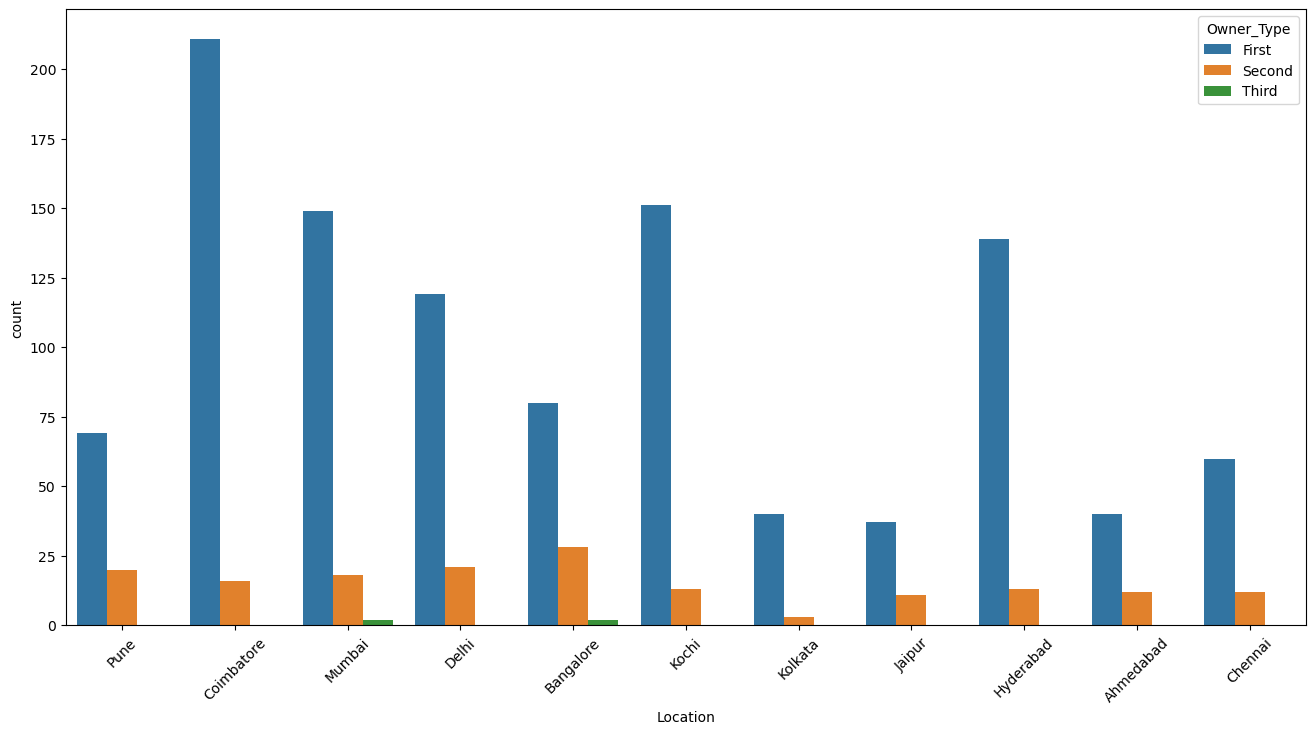

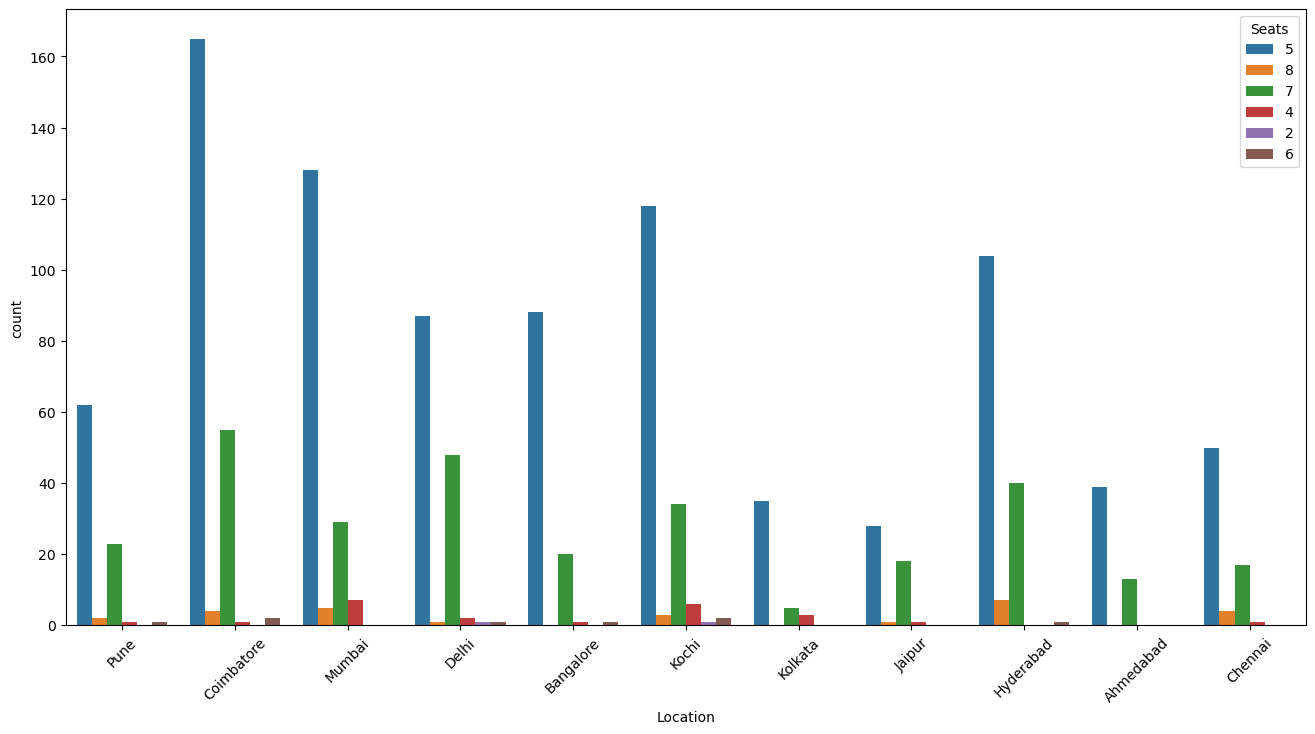

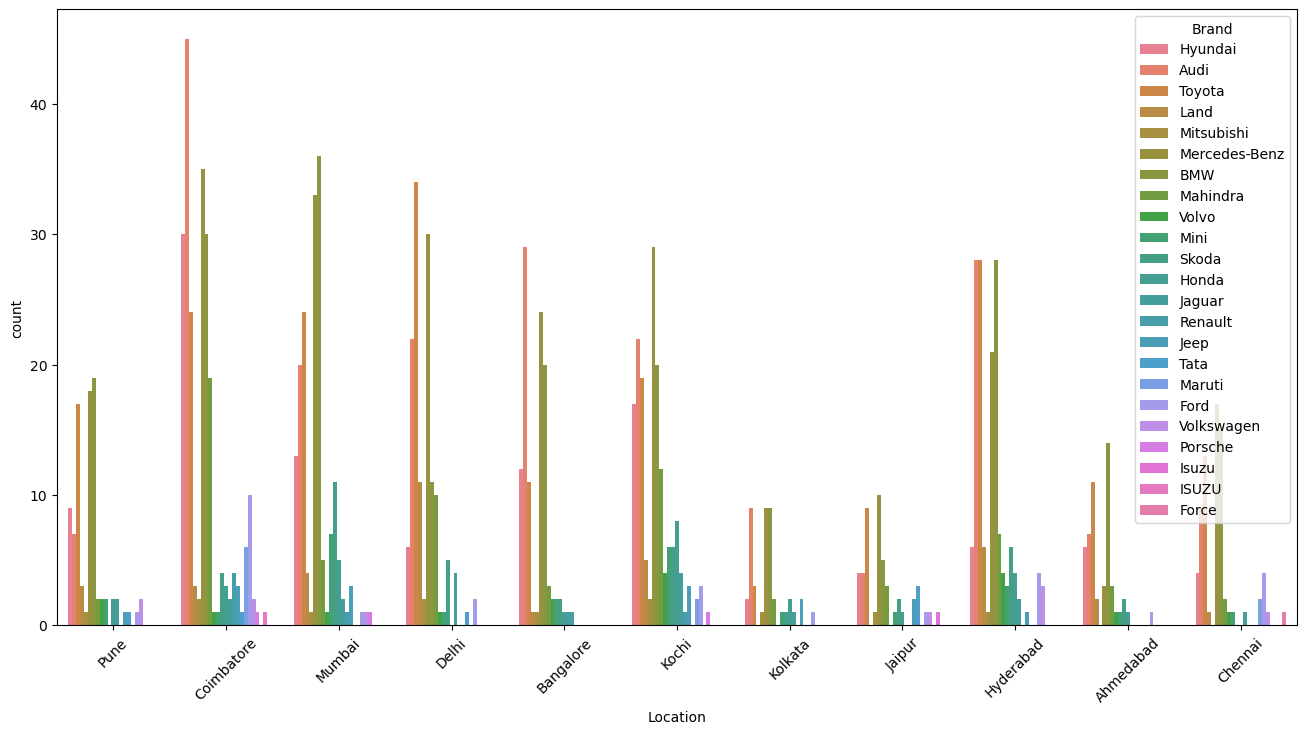

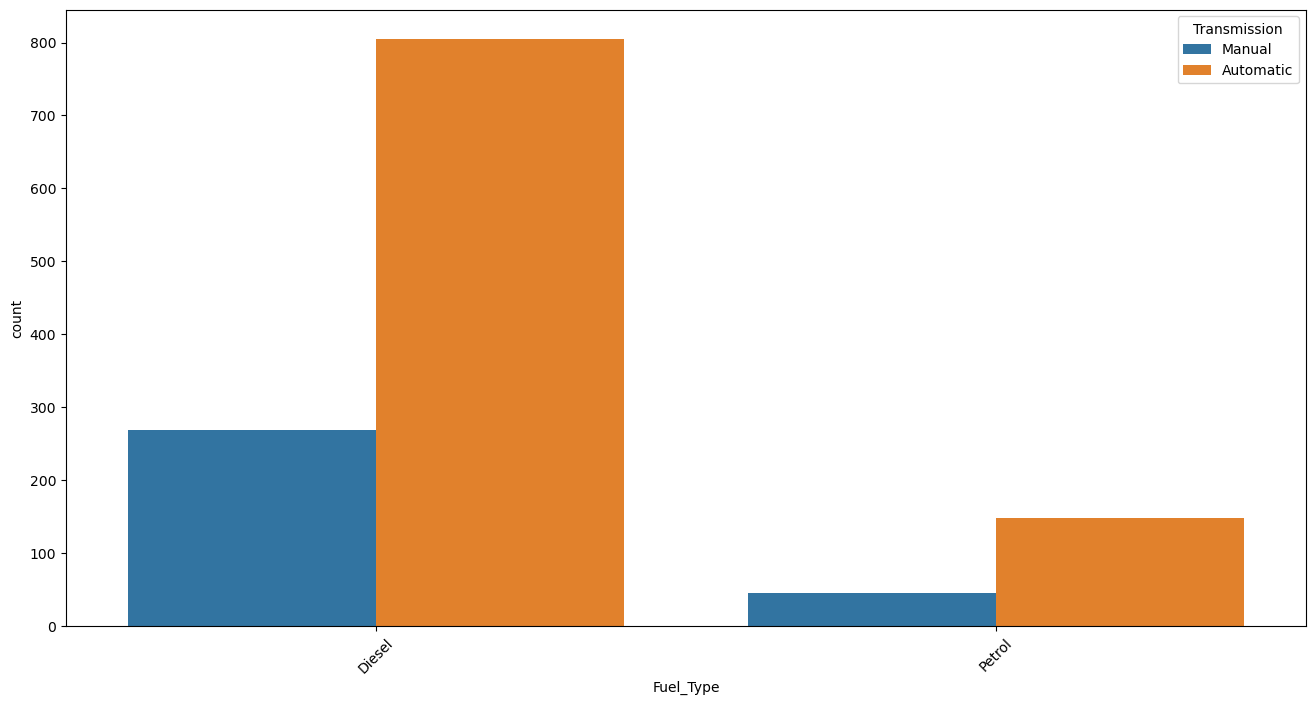

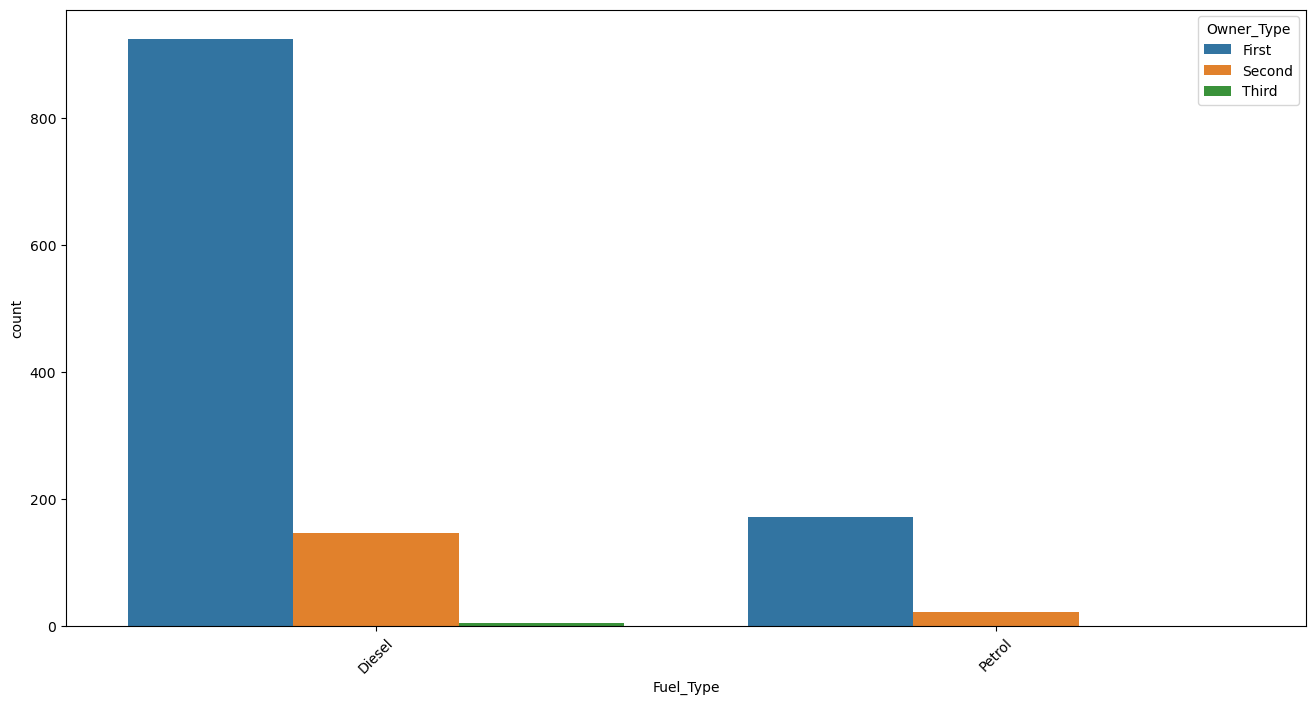

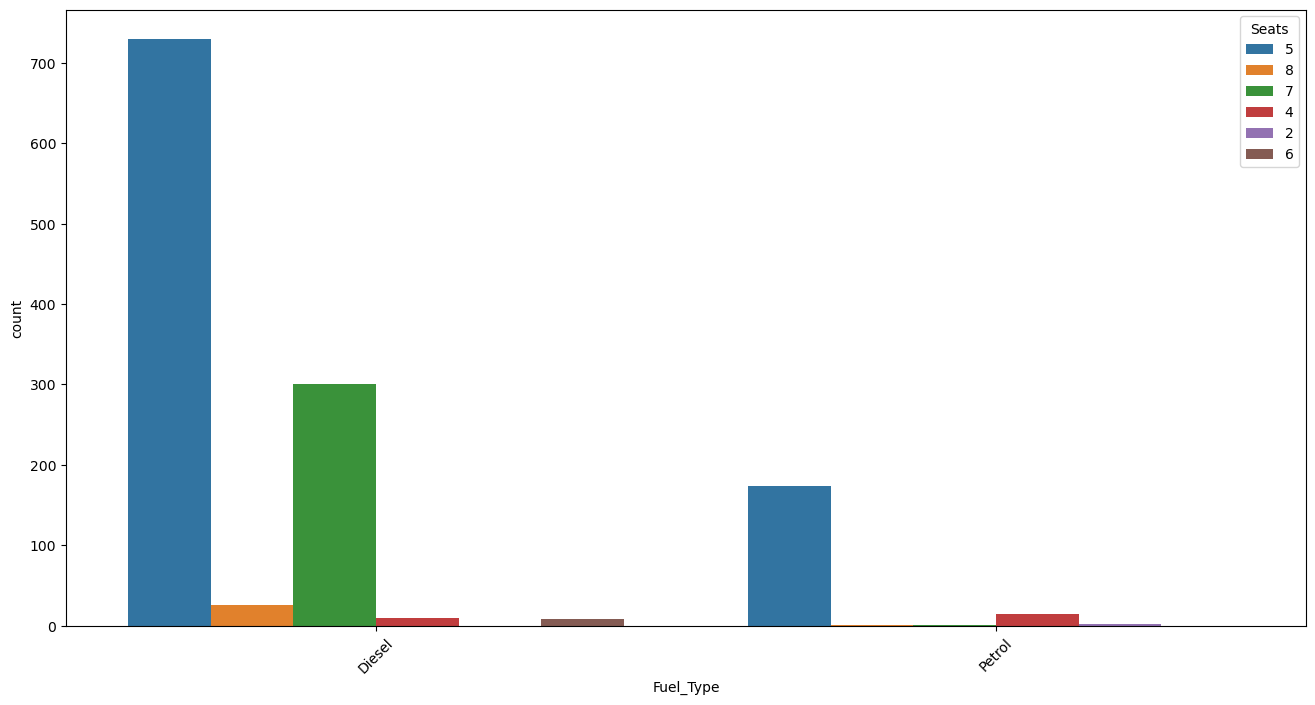

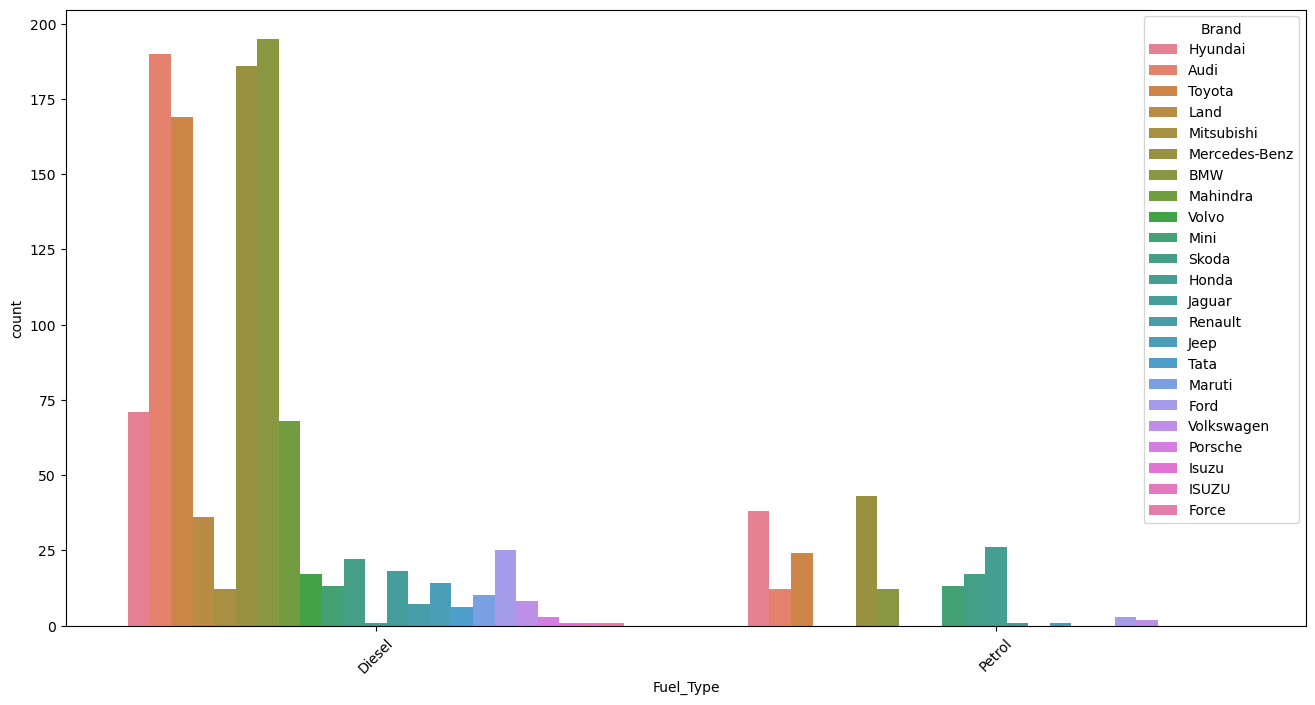

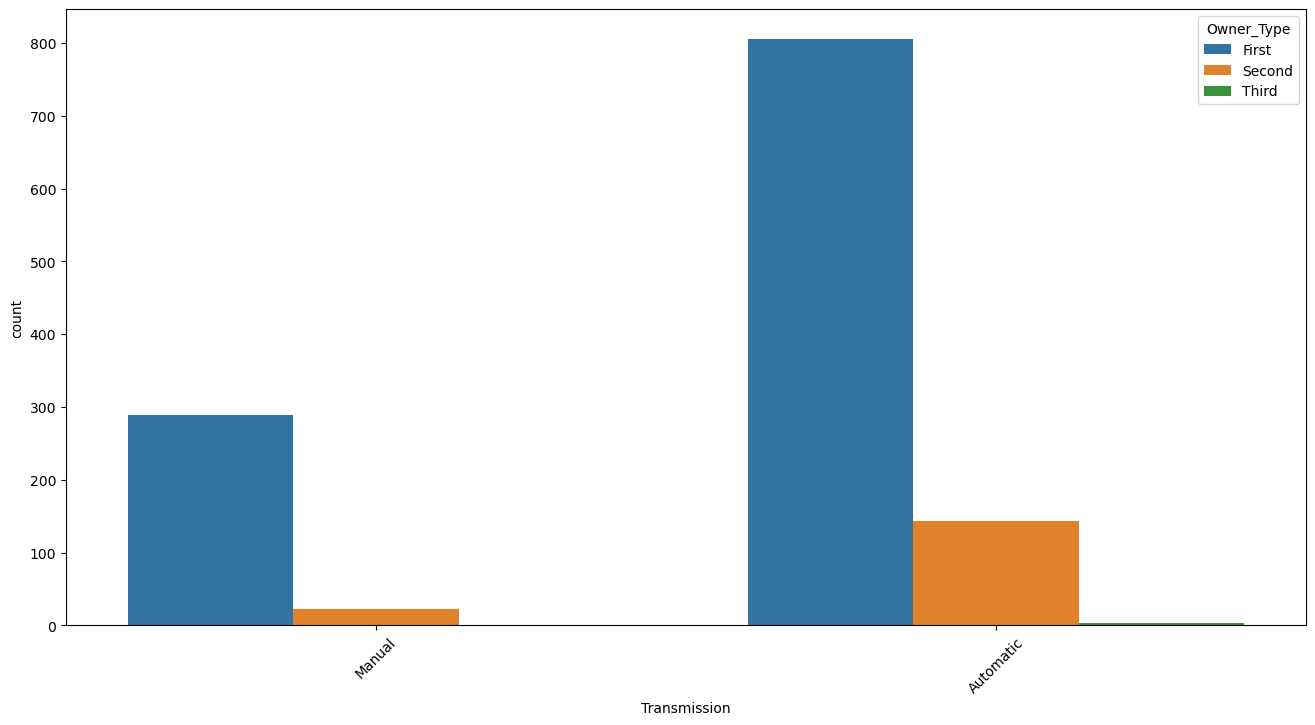

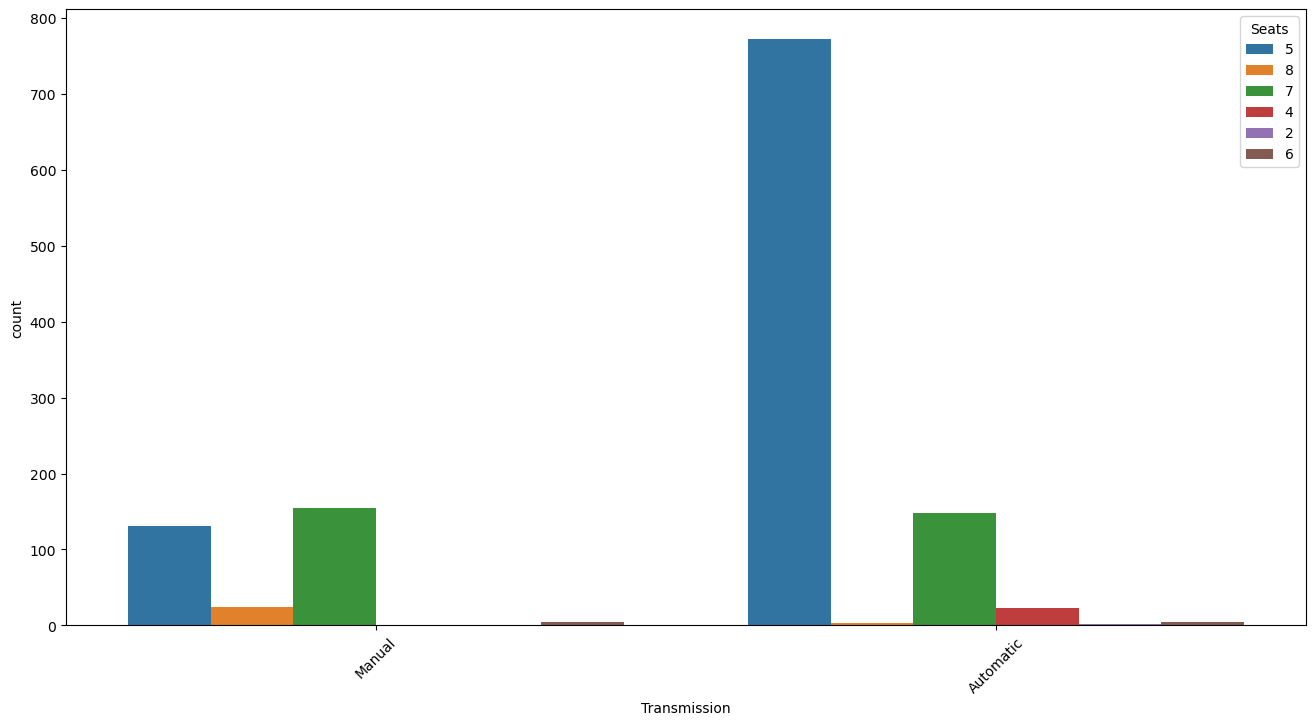

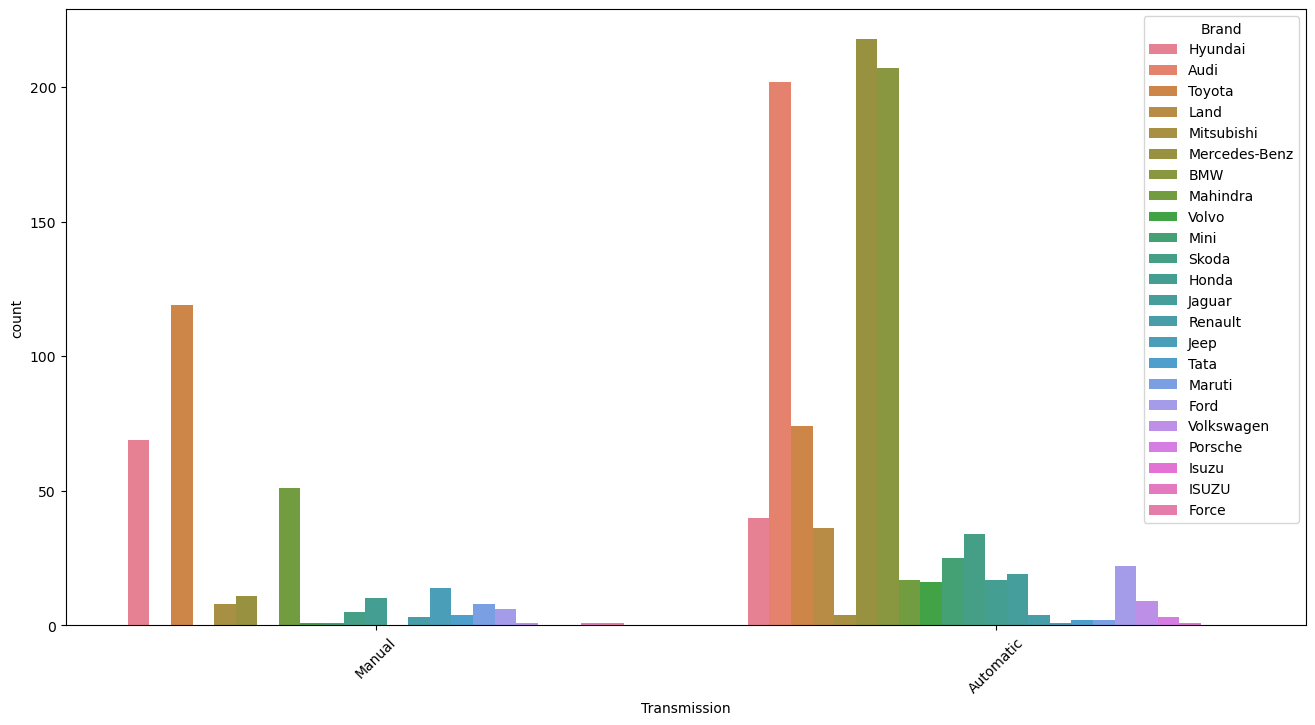

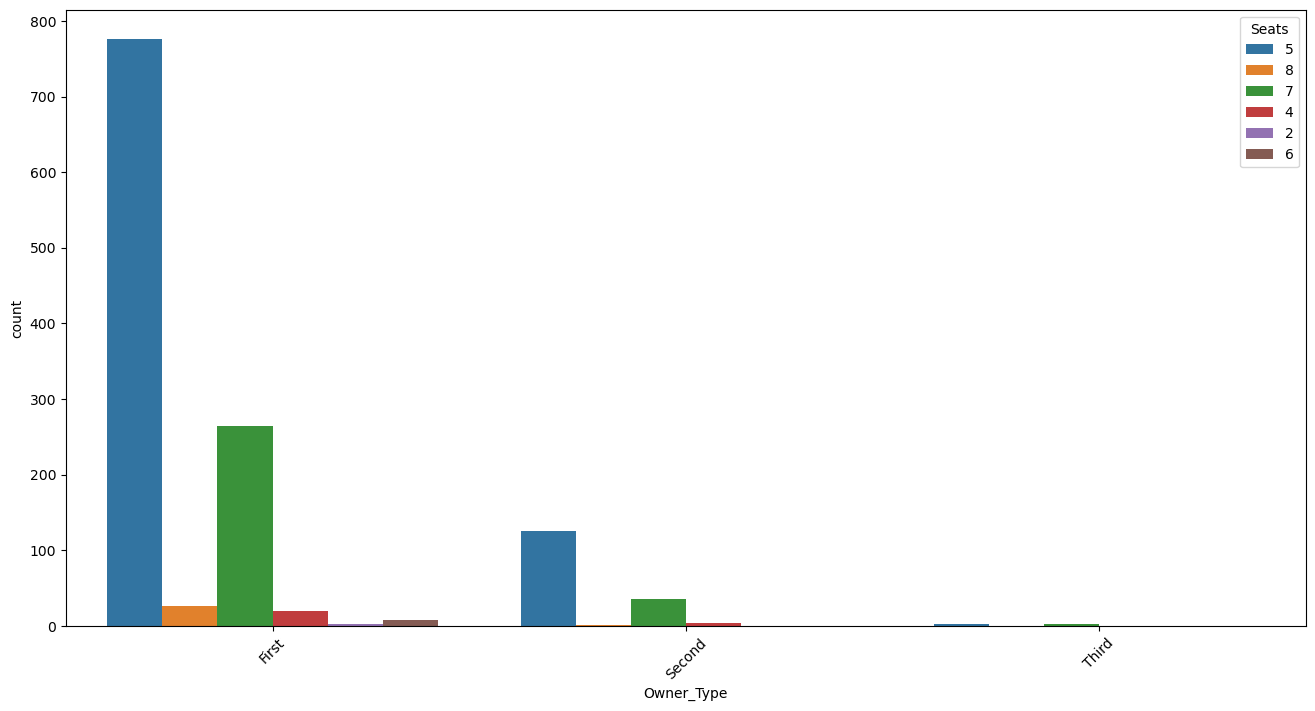

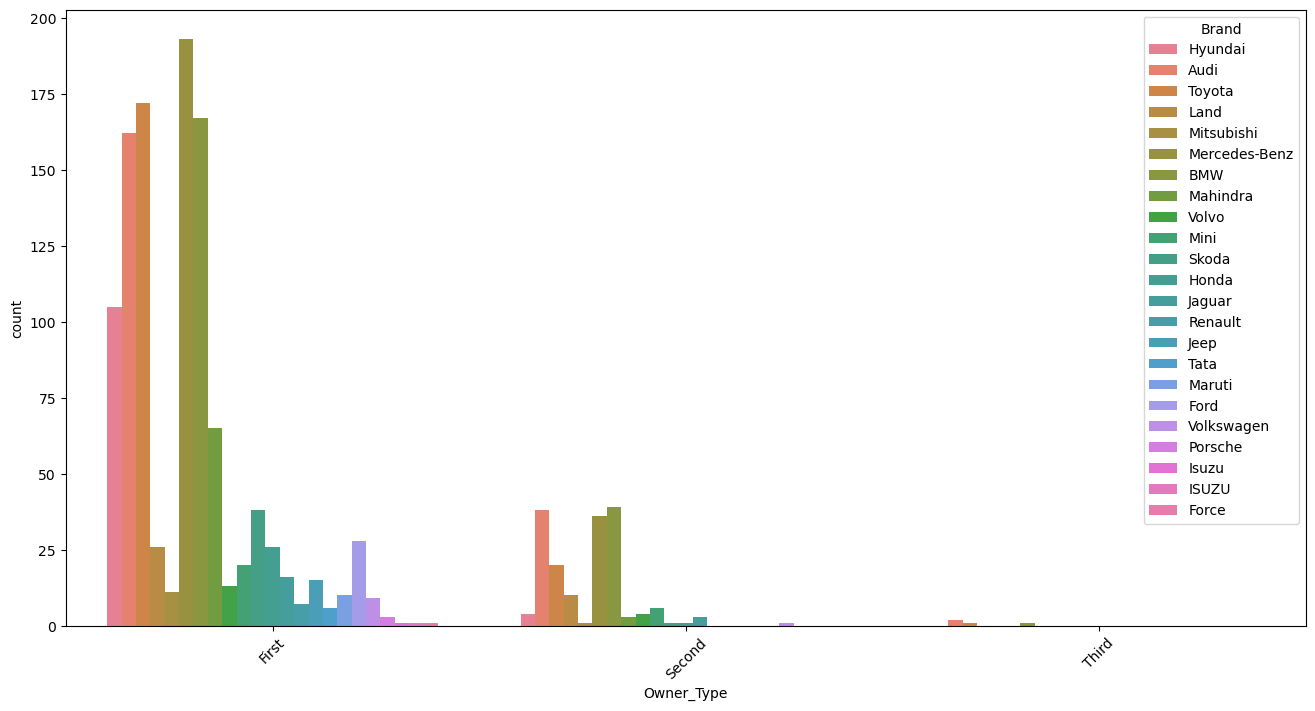

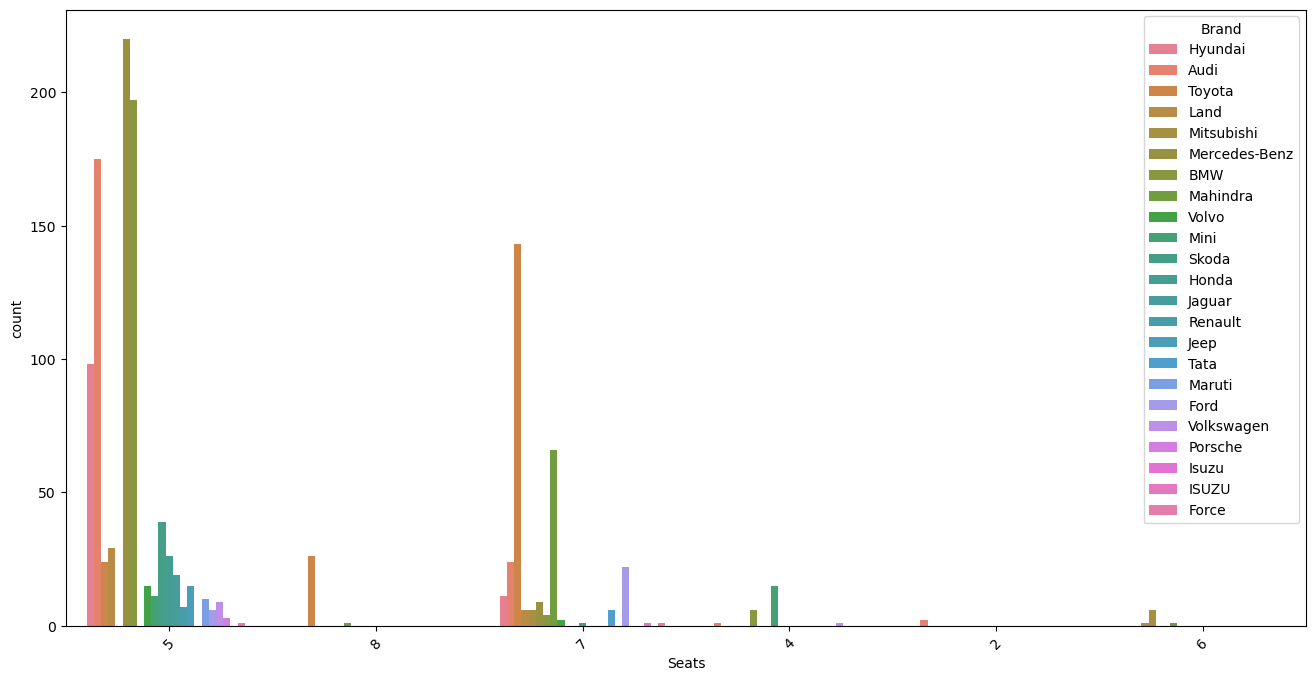

In [291]:
list1=[]
count=0
for col1 in cat_col_lux:
    for col2 in cat_col_lux:
        if col1==col2 or (col1,col2) in list1 or (col2,col1) in list1:
            continue
        else:
            plt.figure(figsize=(16,8))
            sns.countplot(data=luxury_df,x=luxury_df[col1],hue=luxury_df[col2])
            list1.append((col1,col2))
            plt.xticks(rotation=45)
            plt.show()
            count+=1

# Analysis
Interactions among categorical features in luxury cars.

Automatic + Petrol combinations dominate, Diesel is rare.

Insight: Shows how luxury customers strongly prefer performance and convenience over efficiency.

In [292]:
count,list1

(15,
 [('Location', 'Fuel_Type'),
  ('Location', 'Transmission'),
  ('Location', 'Owner_Type'),
  ('Location', 'Seats'),
  ('Location', 'Brand'),
  ('Fuel_Type', 'Transmission'),
  ('Fuel_Type', 'Owner_Type'),
  ('Fuel_Type', 'Seats'),
  ('Fuel_Type', 'Brand'),
  ('Transmission', 'Owner_Type'),
  ('Transmission', 'Seats'),
  ('Transmission', 'Brand'),
  ('Owner_Type', 'Seats'),
  ('Owner_Type', 'Brand'),
  ('Seats', 'Brand')])

# MULTIVARIATE ANALYSIS

In [293]:
numeric_df = budget_df.select_dtypes(include=["number"])
numeric_df.reset_index(drop=True, inplace= True)
numeric_df.corr().round(2)

,Kilometers_Driven,Mileage,Engine,Power,Price,Car Age
Kilometers_Driven,1.00,-0.18,0.33,0.16,-0.15,0.44
Mileage,-0.18,1.00,-0.55,-0.47,0.03,-0.46
Engine,0.33,-0.55,1.00,0.79,0.39,0.28
Power,0.16,-0.47,0.79,1.00,0.48,0.17
Price,-0.15,0.03,0.39,0.48,1.00,-0.53
Car Age,0.44,-0.46,0.28,0.17,-0.53,1.00


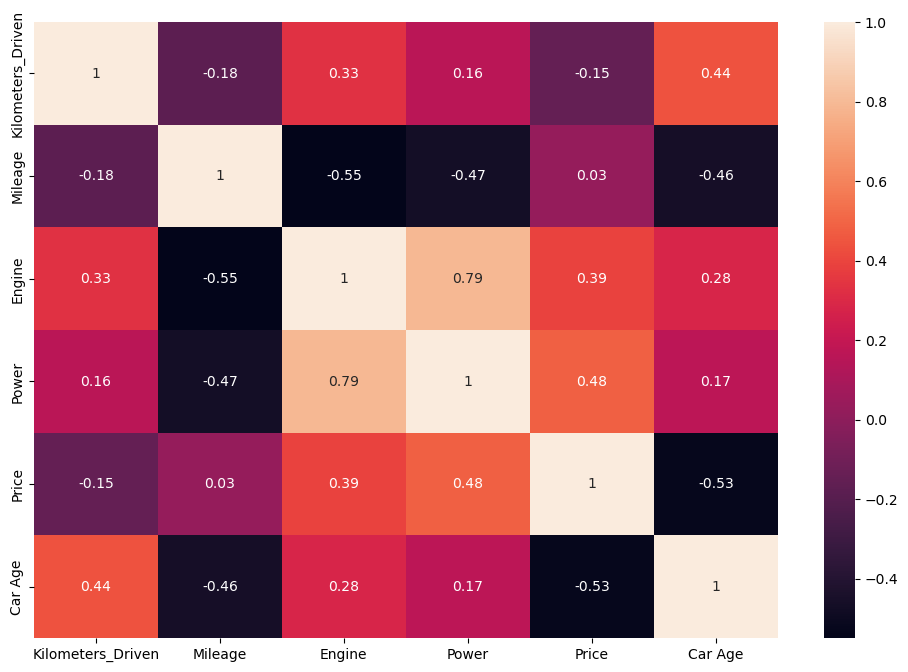

In [294]:
plt.figure(figsize = (12,8))
sns.heatmap(numeric_df.corr().round(2), annot = True)
plt.show()

# Analysis
Displays correlations between numerical variables.

Engine and Power → highly correlated.

Price positively correlated with Engine & Power, slightly negative with Mileage.

Kilometers Driven shows weak relation with Price.

Insight: Confirms earlier visual trends. Suggests feature reduction: keep either Engine or Power, but not both.